# Cisco - Ariel University API Security Detection Challenge 2023

## Student ID: 207276775
GitHub project: https://github.com/RazElbaz/API_security_challenge

# Data exploration

In [1]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Data exploration
### Explore the data, understand the featues, statistics visualize the inputs

### What is Data Exploration?
Data exploration definition: Data exploration refers to the initial step in data analysis in which data analysts use data visualization and statistical techniques to describe dataset characterizations, such as size, quantity, and accuracy, in order to better understand the nature of the data.

https://www.heavy.ai/learn/data-exploration 
### Why Is Data Exploration Important? 
Exploration allows for deeper understanding of a dataset, making it easier to navigate and use the data later. The better an analyst knows the data they're working with, the better their analysis will be.

https://www.alteryx.com/glossary/data-exploration

#### imports:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#### functions:

In [3]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                'request.headers.Connection',
                'request.headers.Host',
                'request.headers.Accept',
                'request.method',
                'request.headers.Accept-Language',
                'request.headers.Sec-Fetch-Site',
                'request.headers.Sec-Fetch-Mode',
                'request.headers.Sec-Fetch-Dest',
                'request.headers.Sec-Fetch-User',
                'response.status',
                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                    'request.headers.Set-Cookie',
                    'request.headers.Date',
                    'request.url',
                    'response.headers.Content-Type',
                    'response.body',
                    'response.headers.Location',
                    'request.headers.Content-Length',
                    'request.headers.Cookie'
                    ]

COLUMNS_TO_REMOVE = ['request.body',
                    'response.headers.Content-Length',
                    'request.headers.Date']

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
    return df


In [4]:
def remove(df):
    for column in df.columns[df.isna().any()].tolist():
        # df.drop(column, axis=1, inplace=True)
        df[column] = df[column].fillna('None')
    return df

In [5]:
def fill(df):
    df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
    df['attack_type'] = df['request.Attack_Tag']

    # This function will be used in the lambda below to iterate over the label columns 
    # You can use this snippet to run your own lambda on any data with the apply() method
    def categorize(row):  
        if row['request.Attack_Tag'] == 'Benign':
            return 'Benign'
        return 'Malware'

    df['label'] = df.apply(lambda row: categorize(row), axis=1)

    # After finishing the arrangements we delete the irrelevant column
    df.drop('request.Attack_Tag', axis=1, inplace=True)
    return df

## dataset 1:

In [6]:
# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_1_train.json') as file:
    raw_ds = json.load(file)
df1 = pd.json_normalize(raw_ds, max_level=2)

In [7]:
df1 = fill(df1)

In [8]:
df1 = remove(df1)

In [9]:
df1 = vectorize_df(df1)

In [10]:
df1.head()

request.headers.Host  request.headers.User-Agent  \
0                     0                   -0.632456   
1                     0                   -0.632456   
2                     0                   -0.800000   
3                     0                   -0.516398   
4                     0                    0.377964   

   request.headers.Accept-Encoding  request.headers.Accept  \
0                                0                       0   
1                                0                       0   
2                                0                       0   
3                                0                       0   
4                                0                       0   

   request.headers.Connection  request.headers.Accept-Language  \
0                           0                                1   
1                           0                                0   
2                           0                                0   
3                           0                                1   
4                           0                                0   

   request.headers.Sec-Fetch-Site  request.headers.Sec-Fetch-Mode  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   request.headers.Sec-Fetch-User  request.headers.Sec-Fetch-Dest  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                              29   

   request.headers.Set-Cookie  request.method  request.url  response.status  \
0                   -0.786334               0     0.000000                0   
1                   -0.786146               0     0.000000                4   
2                   -0.751646               0     1.000000                0   
3                   -0.716002               0     0.894427                4   
4                   -0.691095               0     0.000000                4   

   response.headers.Content-Type  response.status_code  response.body  \
0                           -1.0                   200       0.000000   
1                           -1.0                   404       0.000000   
2                           -1.0                   200       0.436436   
3                           -1.0                   404       0.577350   
4                           -1.0                   404       0.000000   

   request.headers.Cookie  response.headers.Location  \
0               -1.000000                       -1.0   
1               -1.000000                       -1.0   
2               -0.408248                       -1.0   
3               -1.000000                       -1.0   
4               -1.000000                       -1.0   

   request.headers.Content-Length response.headers.Set-Cookie  \
0                            -1.0                        None   
1                            -1.0                        None   
2                            -1.0                        None   
3                            -1.0                        None   
4                            -1.0                        None   

           attack_type    label  
0  Directory Traversal  Malware  
1               Benign   Benign  
2     Cookie Injection  Malware  
3               Benign   Benign  
4                LOG4J  Malware

In [11]:
df1

request.headers.Host  request.headers.User-Agent  \
0                        0                   -0.632456   
1                        0                   -0.632456   
2                        0                   -0.800000   
3                        0                   -0.516398   
4                        0                    0.377964   
...                    ...                         ...   
4277                     0                    0.000000   
4278                     0                   -0.755929   
4279                     0                    0.000000   
4280                     0                   -0.755929   
4281                     0                    0.000000   

      request.headers.Accept-Encoding  request.headers.Accept  \
0                                   0                       0   
1                                   0                       0   
2                                   0                       0   
3                                   0                       0   
4                                   0                       0   
...                               ...                     ...   
4277                                0                       0   
4278                                0                       0   
4279                                0                       0   
4280                                0                       0   
4281                                0                       0   

      request.headers.Connection  request.headers.Accept-Language  \
0                              0                                1   
1                              0                                0   
2                              0                                0   
3                              0                                1   
4                              0                                0   
...                          ...                              ...   
4277                           0                                2   
4278                           0                                0   
4279                           0                                1   
4280                           0                                1   
4281                           0                                1   

      request.headers.Sec-Fetch-Site  request.headers.Sec-Fetch-Mode  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   
...                              ...                             ...   
4277                               0                               1   
4278                               0                               0   
4279                               0                               0   
4280                               0                               0   
4281                               0                               1   

      request.headers.Sec-Fetch-User  request.headers.Sec-Fetch-Dest  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                              29   
...                              ...                             ...   
4277                               0                               0   
4278                               0                               0   
4279                               0                               0   
4280                               0                               0   
4281                               0      

Text(0.5, 1.0, 'Correlation Heatmap')

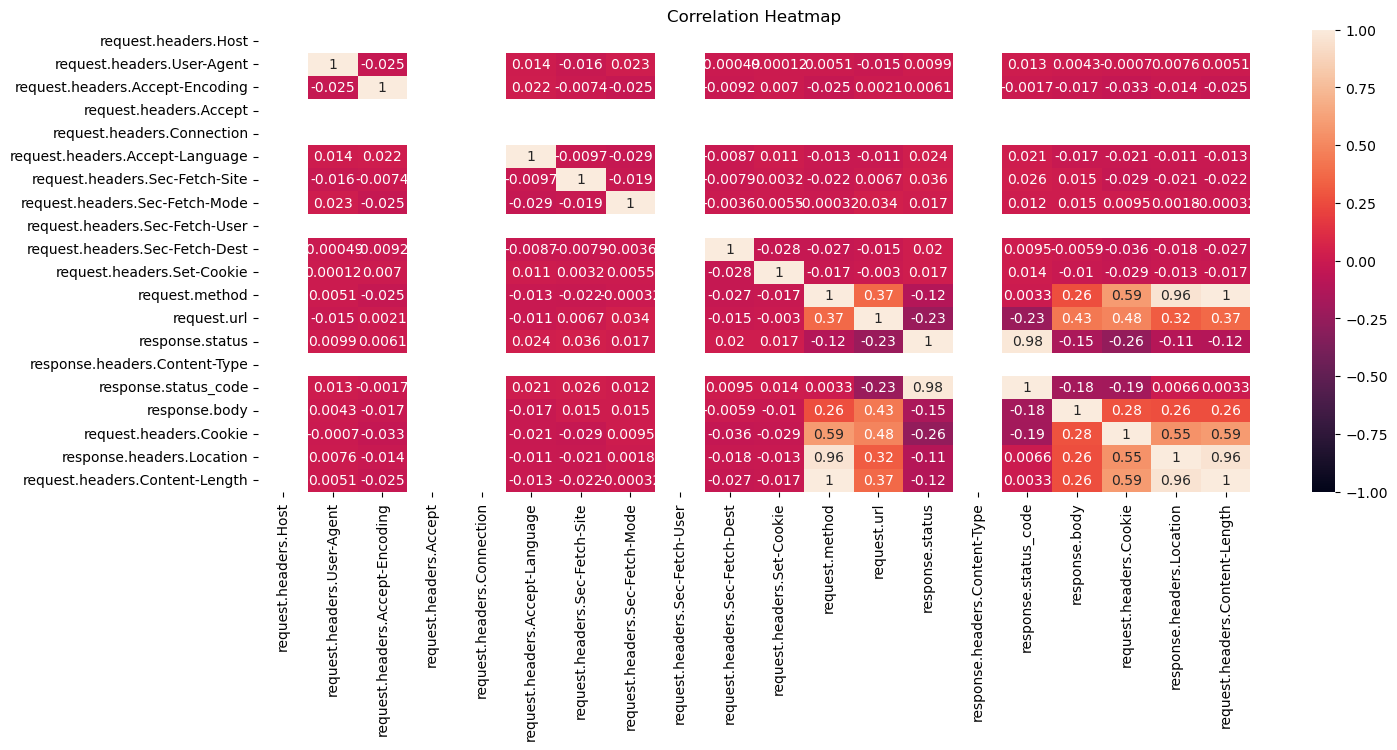

In [12]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

<AxesSubplot:ylabel='count'>

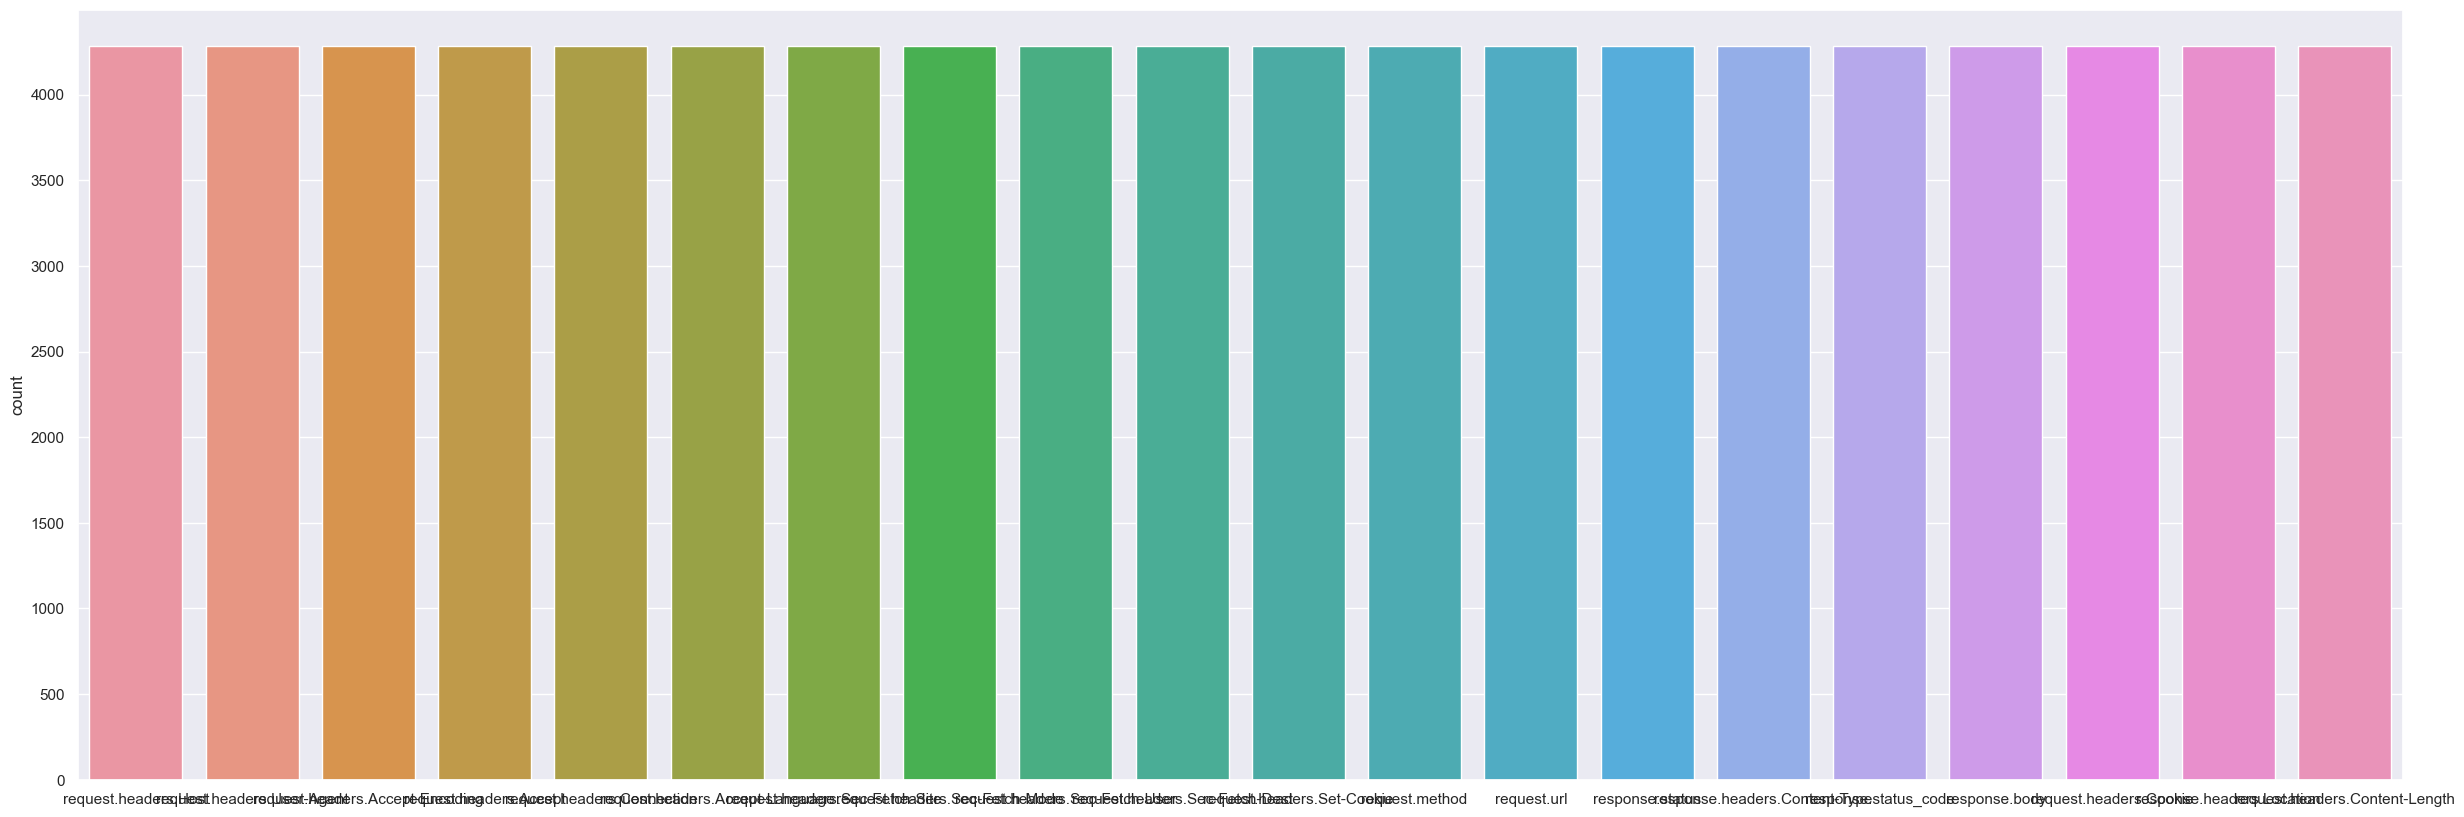

In [13]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(data=df1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


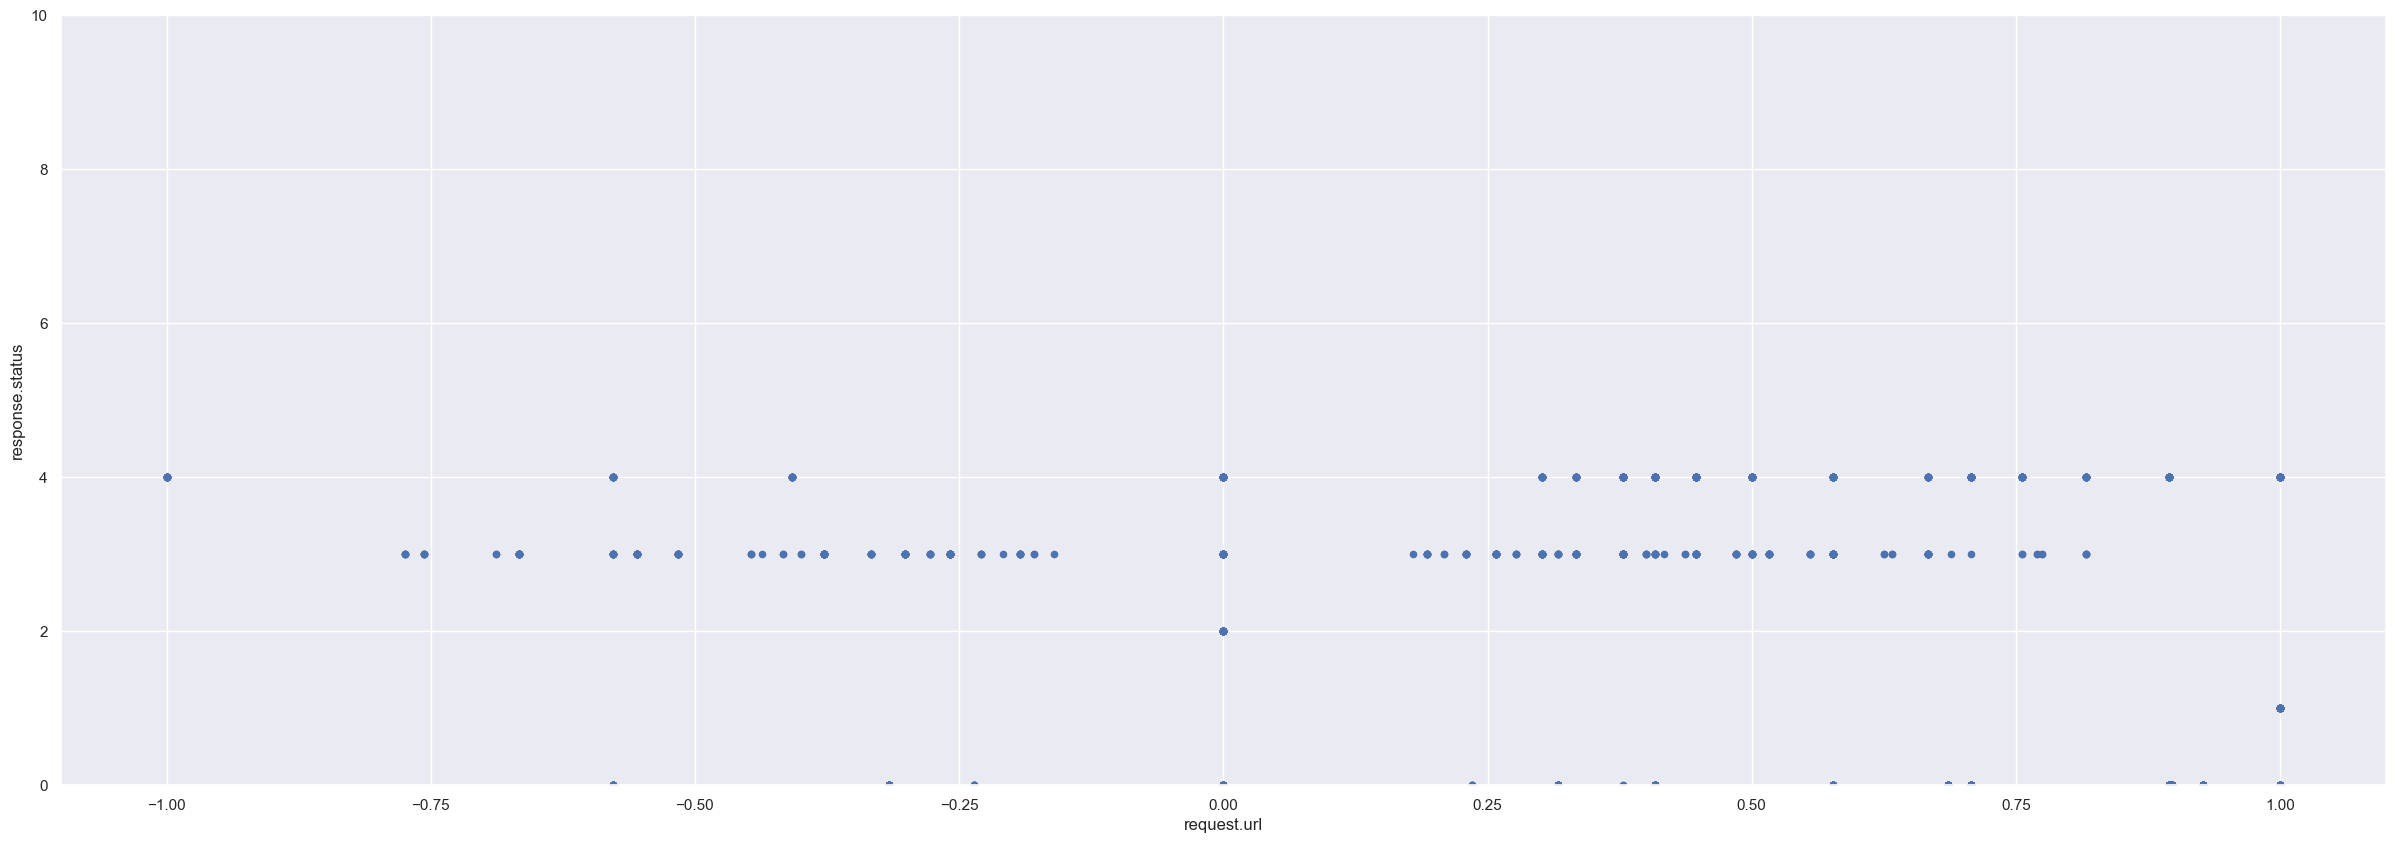

In [14]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df1['response.status'], df1[var]], axis=1)
data.plot.scatter(x=var, y='response.status', ylim=(0,10));

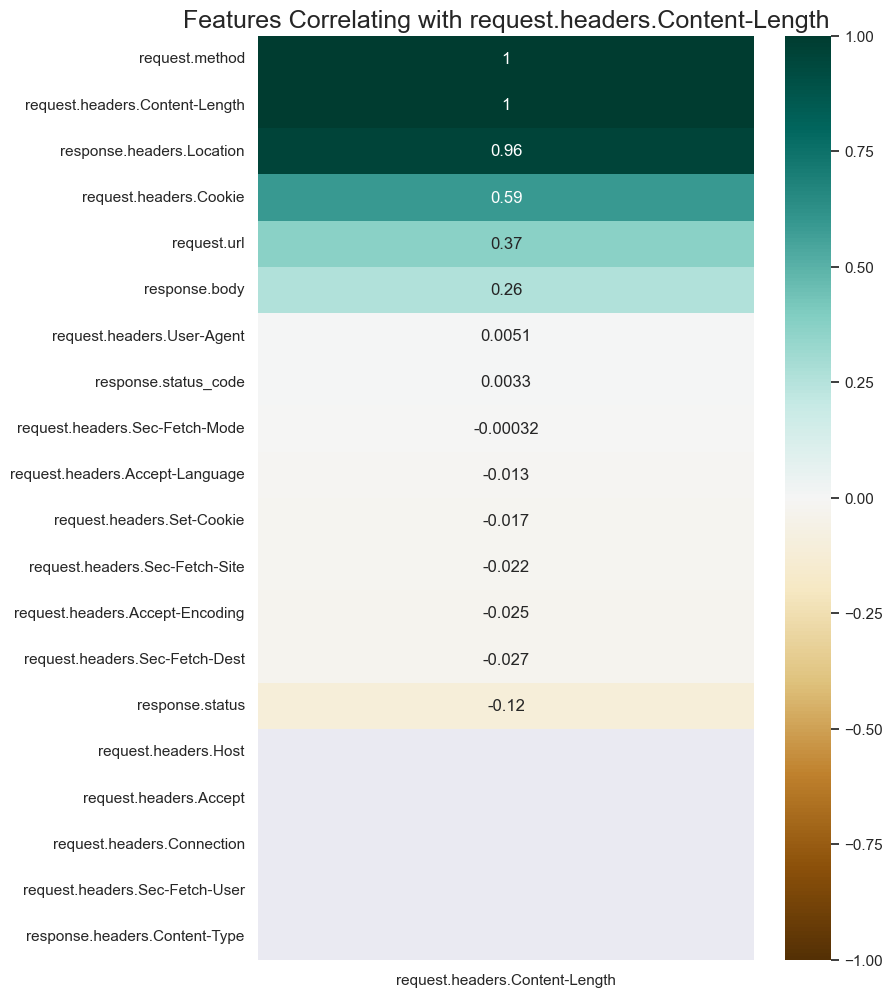

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['request.headers.Content-Length']].sort_values(by='request.headers.Content-Length', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with request.headers.Content-Length', fontdict={'fontsize':18});

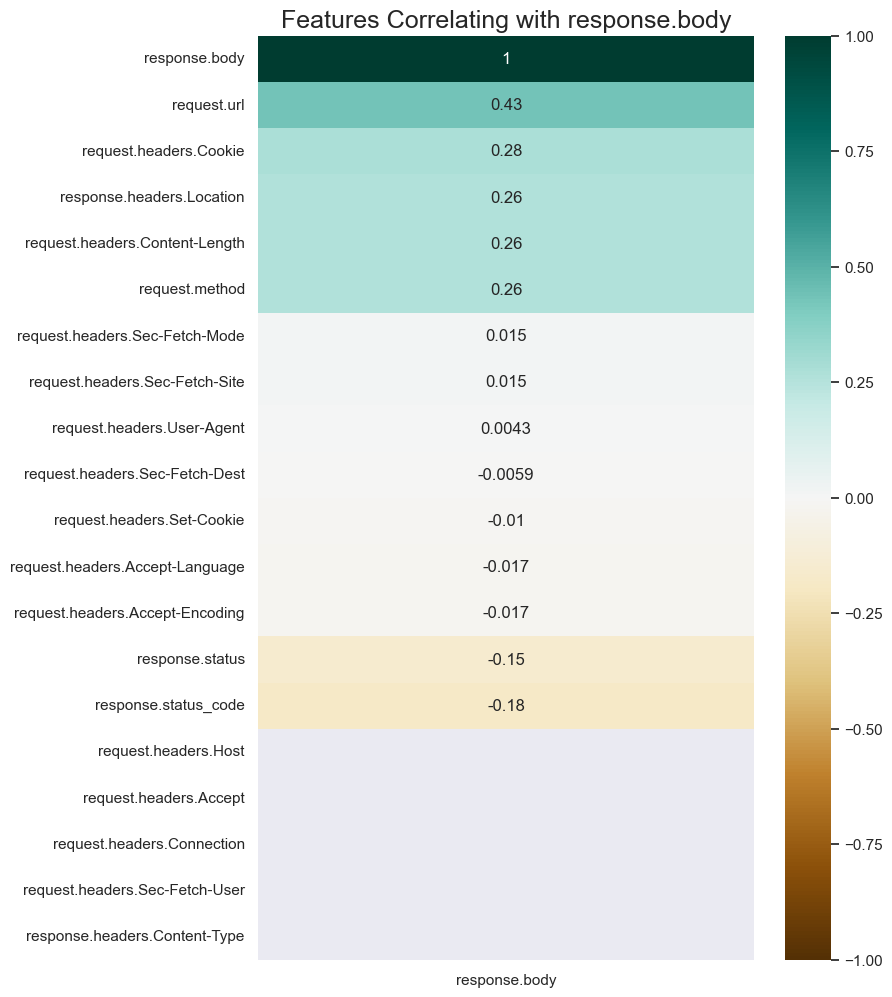

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['response.body']].sort_values(by='response.body', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with response.body', fontdict={'fontsize':18});

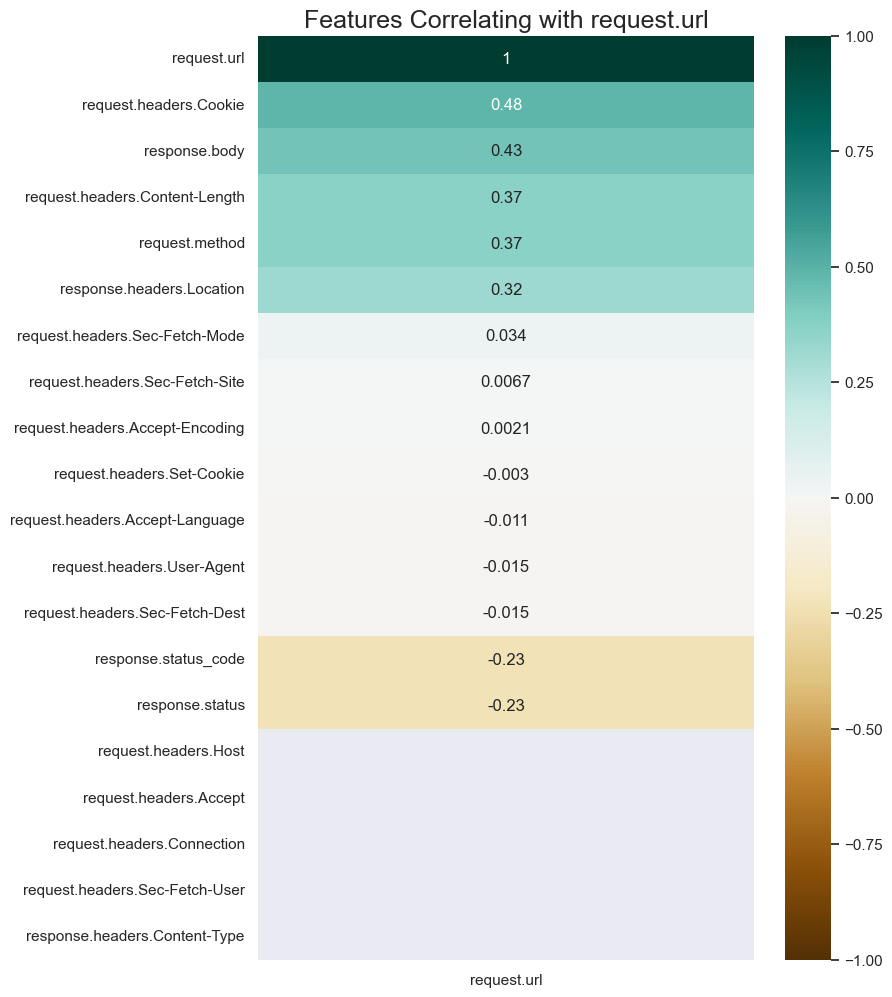

In [17]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['request.url']].sort_values(by='request.url', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with request.url', fontdict={'fontsize':18});

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


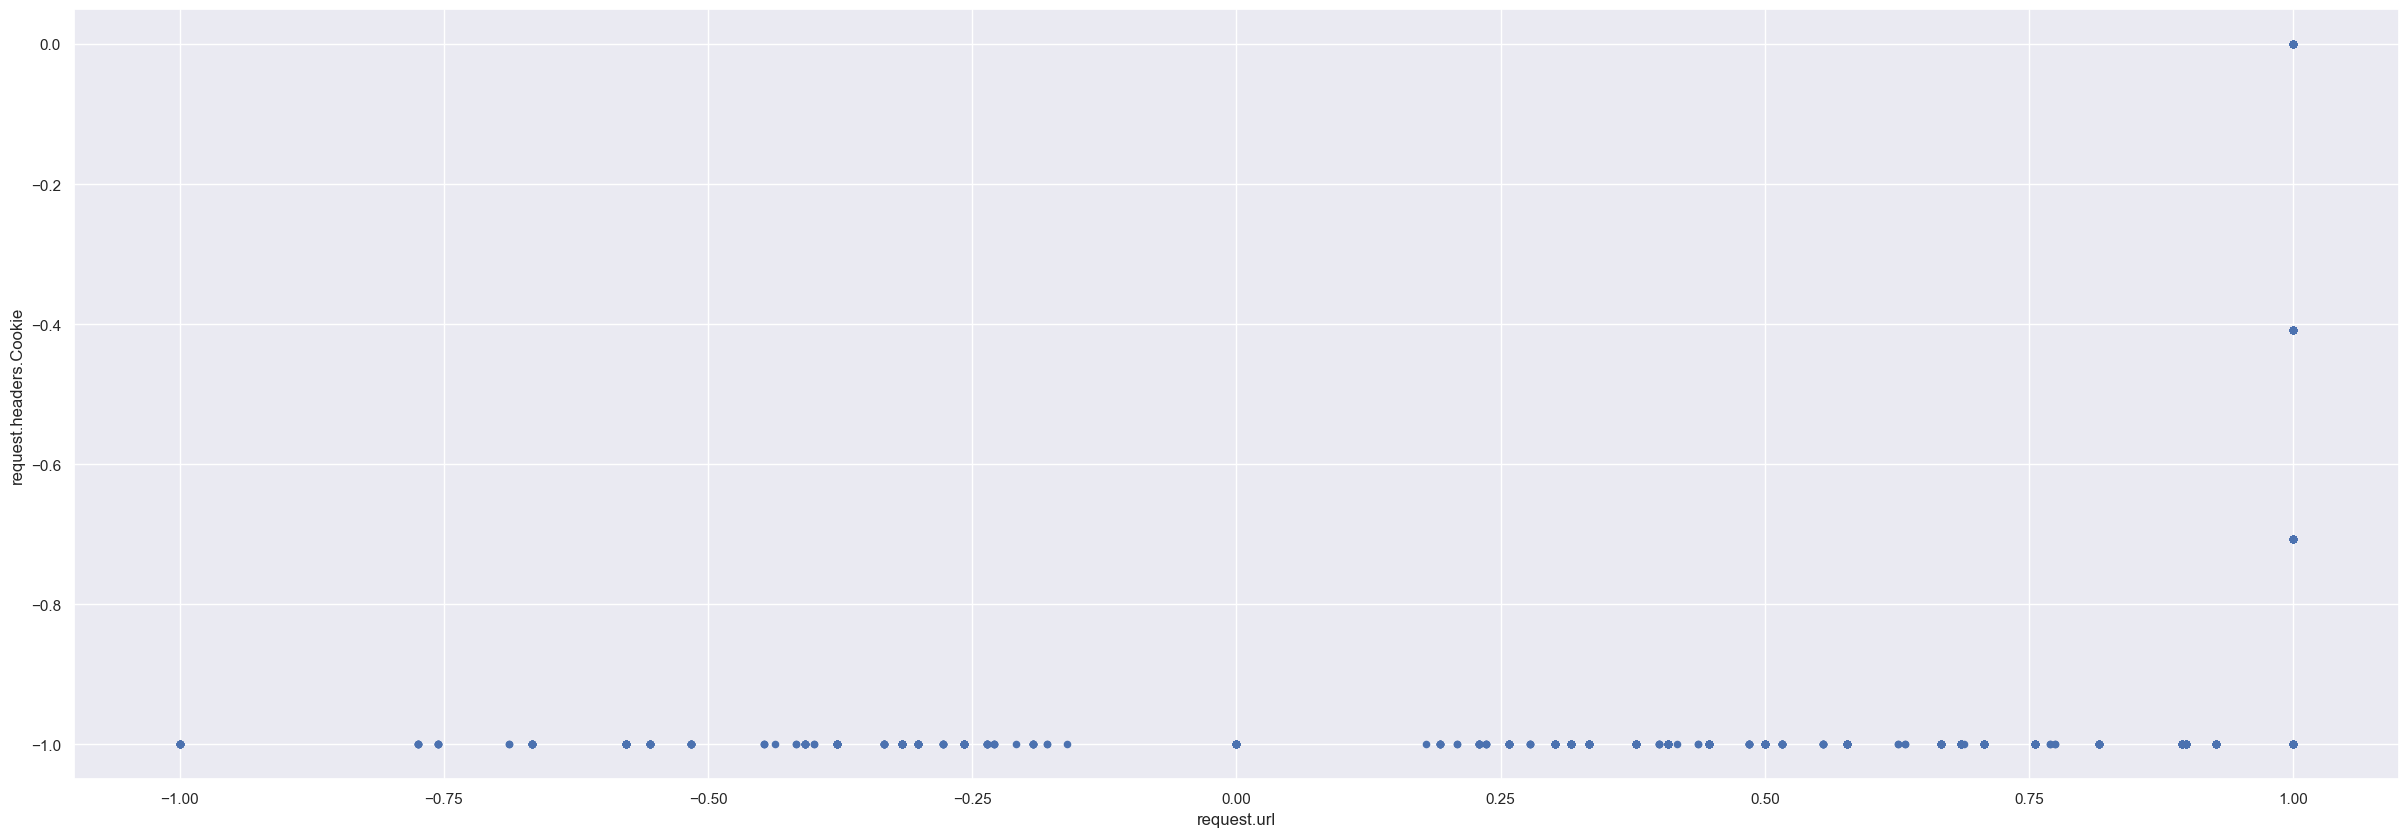

In [18]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df1['request.headers.Cookie'], df1[var]], axis=1)
data.plot.scatter(x=var, y='request.headers.Cookie');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


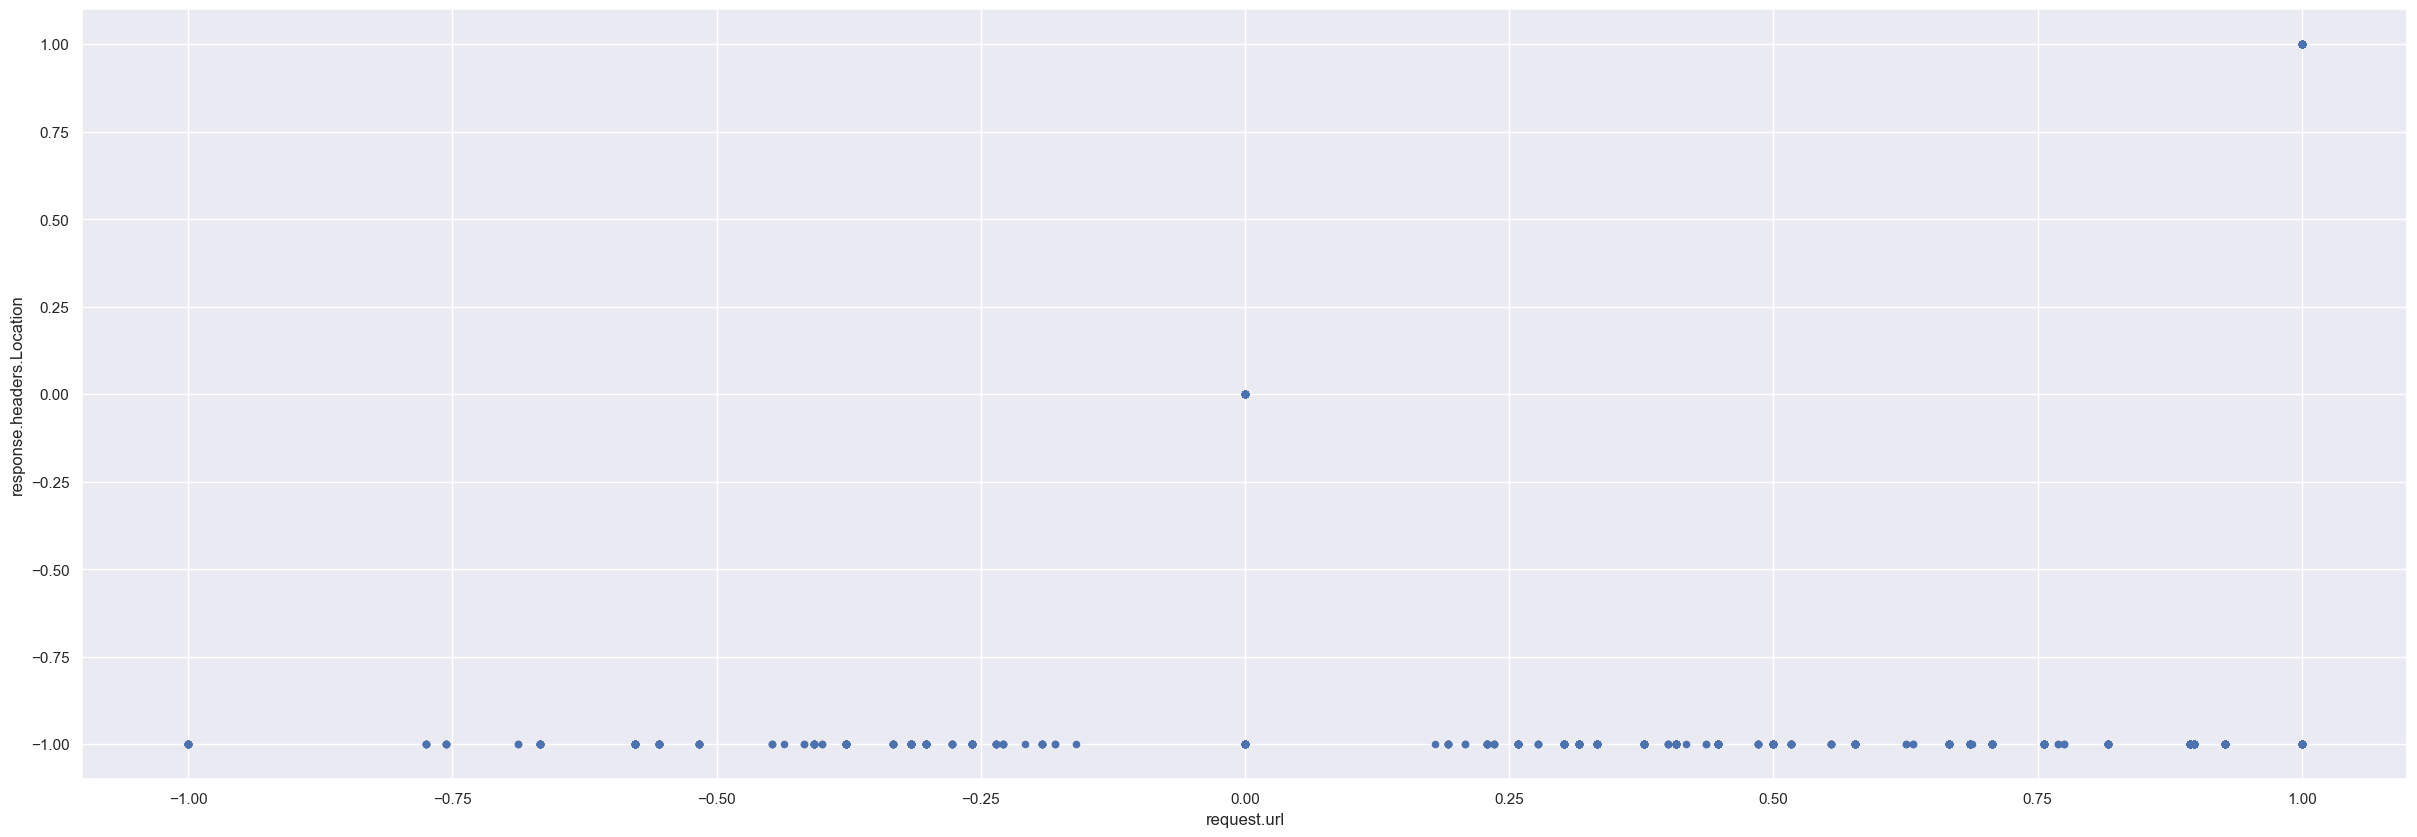

In [19]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df1['response.headers.Location'], df1[var]], axis=1)
data.plot.scatter(x=var, y='response.headers.Location');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


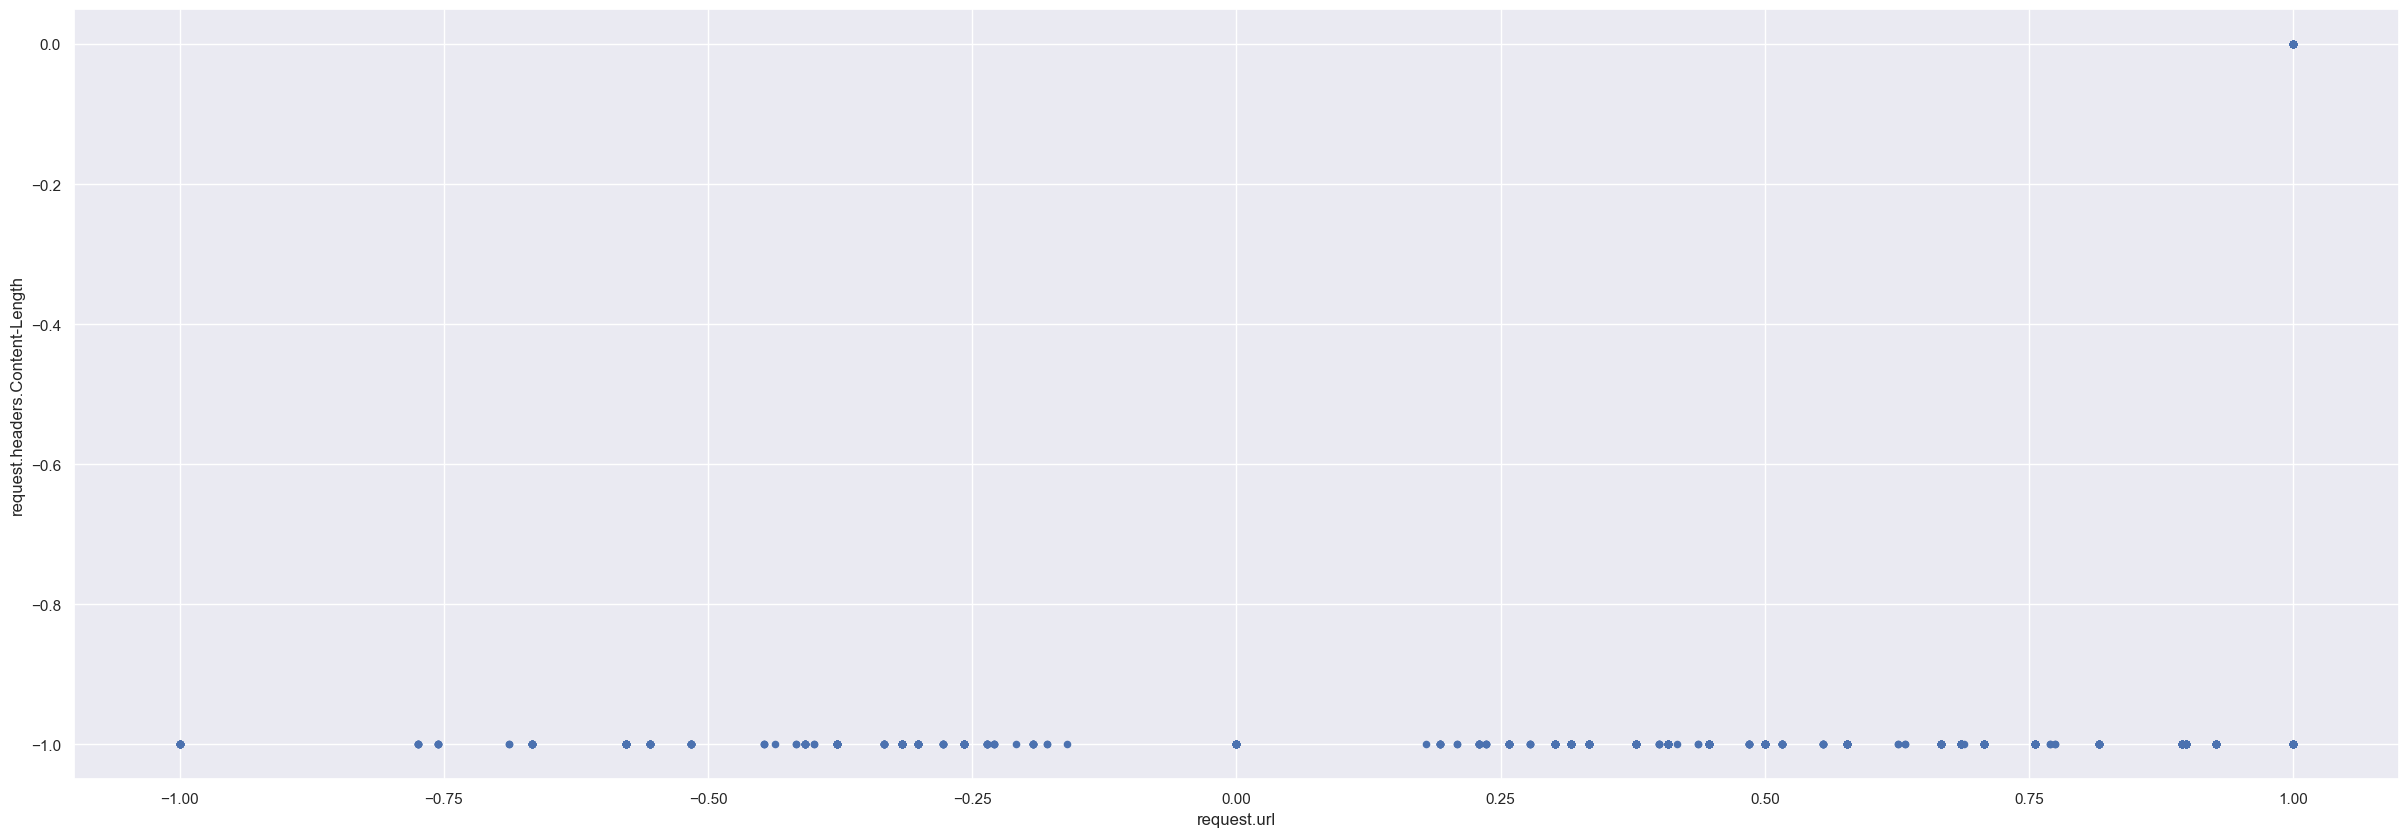

In [20]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df1['request.headers.Content-Length'], df1[var]], axis=1)
data.plot.scatter(x=var, y='request.headers.Content-Length');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


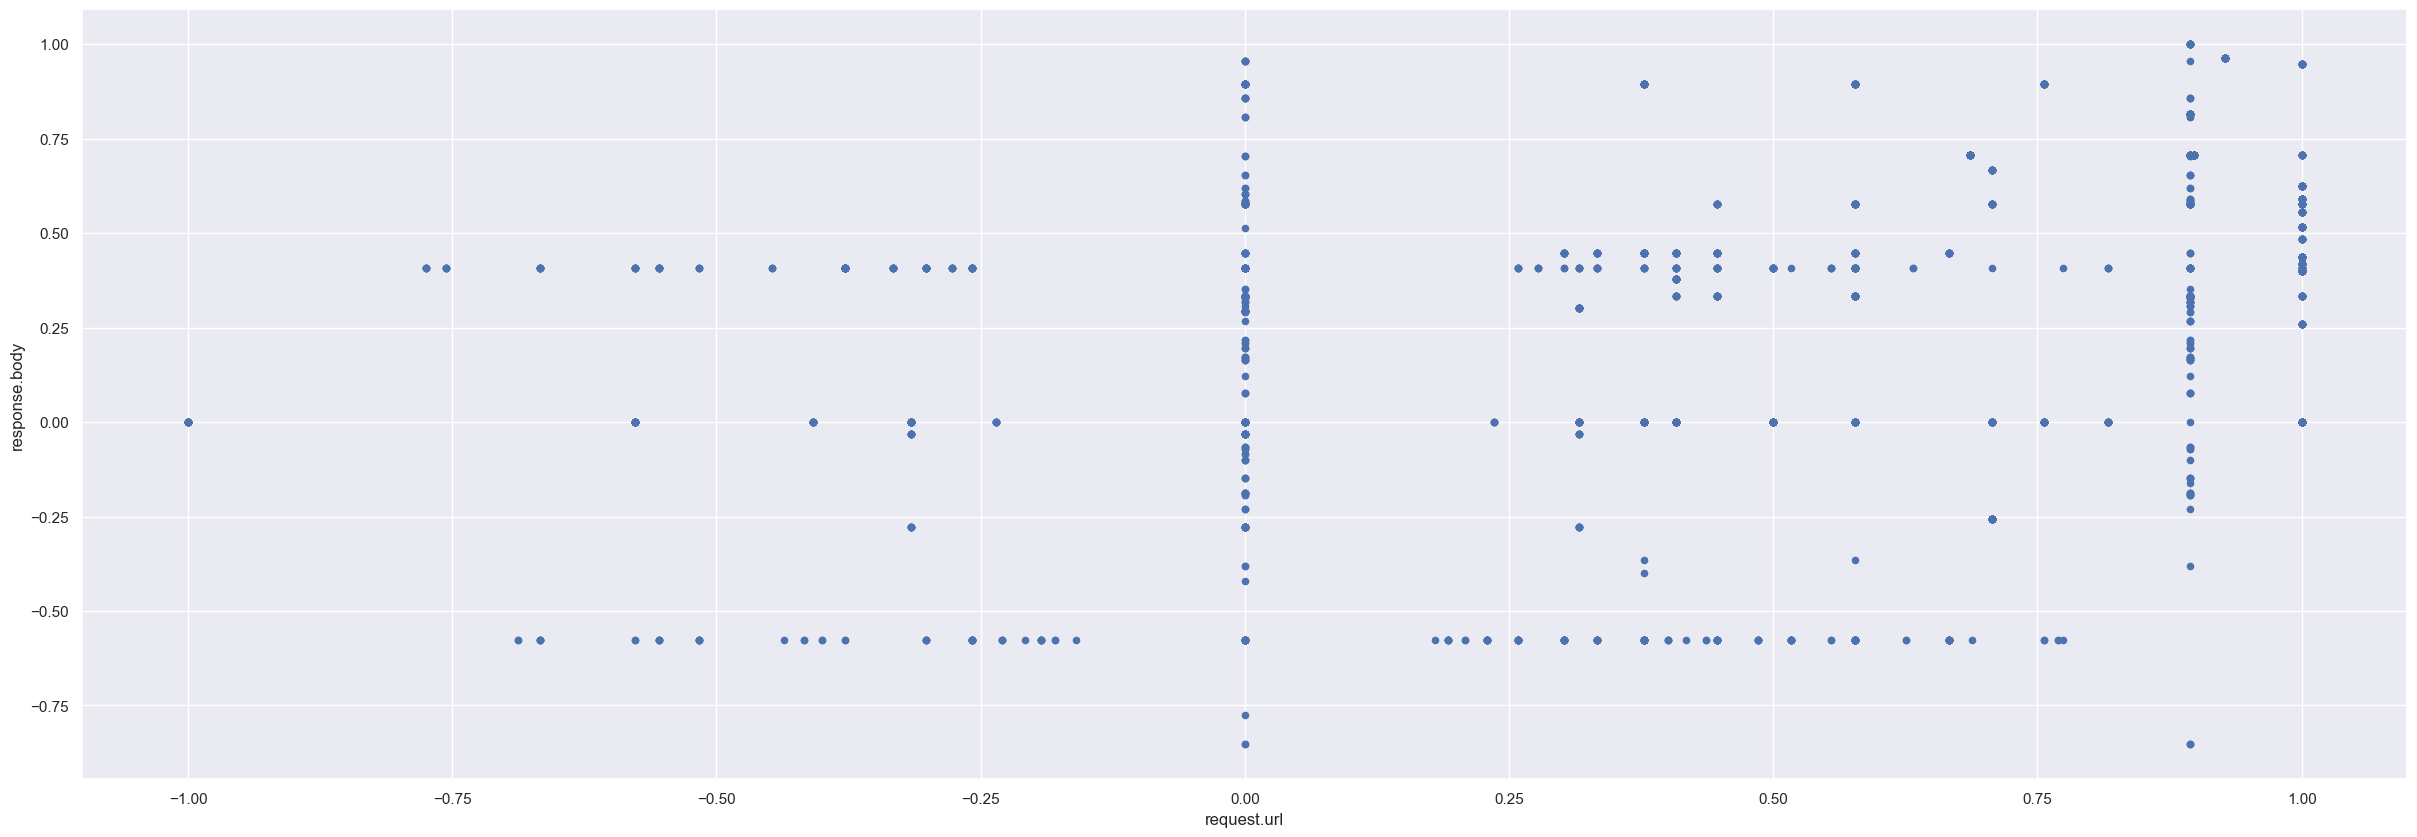

In [21]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df1['response.body'], df1[var]], axis=1)
data.plot.scatter(x=var, y='response.body');

## dataset 2:

In [22]:
with open(f'./dataset_2_train.json') as file:
    raw_ds = json.load(file)
df2 = pd.json_normalize(raw_ds, max_level=2)

In [23]:
df2 = fill(df2)

In [24]:
df2 = remove(df2)

In [25]:
df2 = vectorize_df(df2)

In [26]:
df2.head()

request.headers.Host  request.headers.User-Agent  \
0                     0                   -0.755929   
1                     0                    0.000000   
2                     0                   -0.408248   
3                     0                    0.666667   
4                     0                   -0.471405   

   request.headers.Accept-Encoding  request.headers.Accept  \
0                                0                       0   
1                                0                       0   
2                                0                       0   
3                                0                       0   
4                                0                       0   

   request.headers.Connection  request.headers.Accept-Language  \
0                           0                                1   
1                           0                                3   
2                           0                                1   
3                           0                                2   
4                           0                                3   

   request.headers.Sec-Fetch-Site  request.headers.Sec-Fetch-Mode  \
0                               0                               0   
1                               0                               0   
2                               0                               1   
3                               0                               0   
4                               0                               1   

   request.headers.Sec-Fetch-User  request.headers.Sec-Fetch-Dest  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   request.headers.Set-Cookie  request.method  request.url  response.status  \
0                   -0.646997               0     0.408248                4   
1                   -0.480384               0     0.000000                0   
2                    0.426401               0     0.707107                0   
3                   -0.593391               0     0.577350                4   
4                   -0.652753               0     0.377964                4   

   response.headers.Content-Type  response.status_code  response.body  \
0                           -1.0                   404       0.408248   
1                           -1.0                   200       0.956183   
2                           -1.0                   200      -0.255551   
3                           -1.0                   404       0.408248   
4                           -1.0                   404       0.894427   

   response.headers.Location  request.headers.Cookie  \
0                       -1.0                    -1.0   
1                       -1.0                    -1.0   
2                       -1.0                    -1.0   
3                       -1.0                    -1.0   
4                       -1.0                    -1.0   

   request.headers.Content-Length response.headers.Set-Cookie attack_type  \
0                            -1.0                        None      Benign   
1                            -1.0                        None      Benign   
2                            -1.0                        None      Benign   
3                            -1.0                        None      Benign   
4                            -1.0                        None      Benign   

    label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  
4  Benign

In [27]:
df2

request.headers.Host  request.headers.User-Agent  \
0                          0                   -0.755929   
1                          0                    0.000000   
2                          0                   -0.408248   
3                          0                    0.666667   
4                          0                   -0.471405   
...                      ...                         ...   
127495                     0                    0.000000   
127496                     0                   -0.471405   
127497                     0                    0.000000   
127498                     0                   -0.800000   
127499                     0                   -0.800000   

        request.headers.Accept-Encoding  request.headers.Accept  \
0                                     0                       0   
1                                     0                       0   
2                                     0                       0   
3                                     0                       0   
4                                     0                       0   
...                                 ...                     ...   
127495                                0                       0   
127496                                0                       0   
127497                                0                       0   
127498                                0                       0   
127499                                0                       0   

        request.headers.Connection  request.headers.Accept-Language  \
0                                0                                1   
1                                0                                3   
2                                0                                1   
3                                0                                2   
4                                0                                3   
...                            ...                              ...   
127495                           0                                2   
127496                           0                                0   
127497                           0                                0   
127498                           0                                1   
127499                           0                                1   

        request.headers.Sec-Fetch-Site  request.headers.Sec-Fetch-Mode  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               1   
3                                    0                               0   
4                                    0                               1   
...                                ...                             ...   
127495                               0                               1   
127496                               0                               1   
127497                               0                               1   
127498                               0                               1   
127499                               0                               0   

        request.headers.Sec-Fetch-User  request.headers.Sec-Fetch-Dest  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               0   
3                                    0                               0   
4                                    0                               0   
...                                ...                             ...   
127495                               0                               0   
127496                               0                               0   
127497                               0                               0   


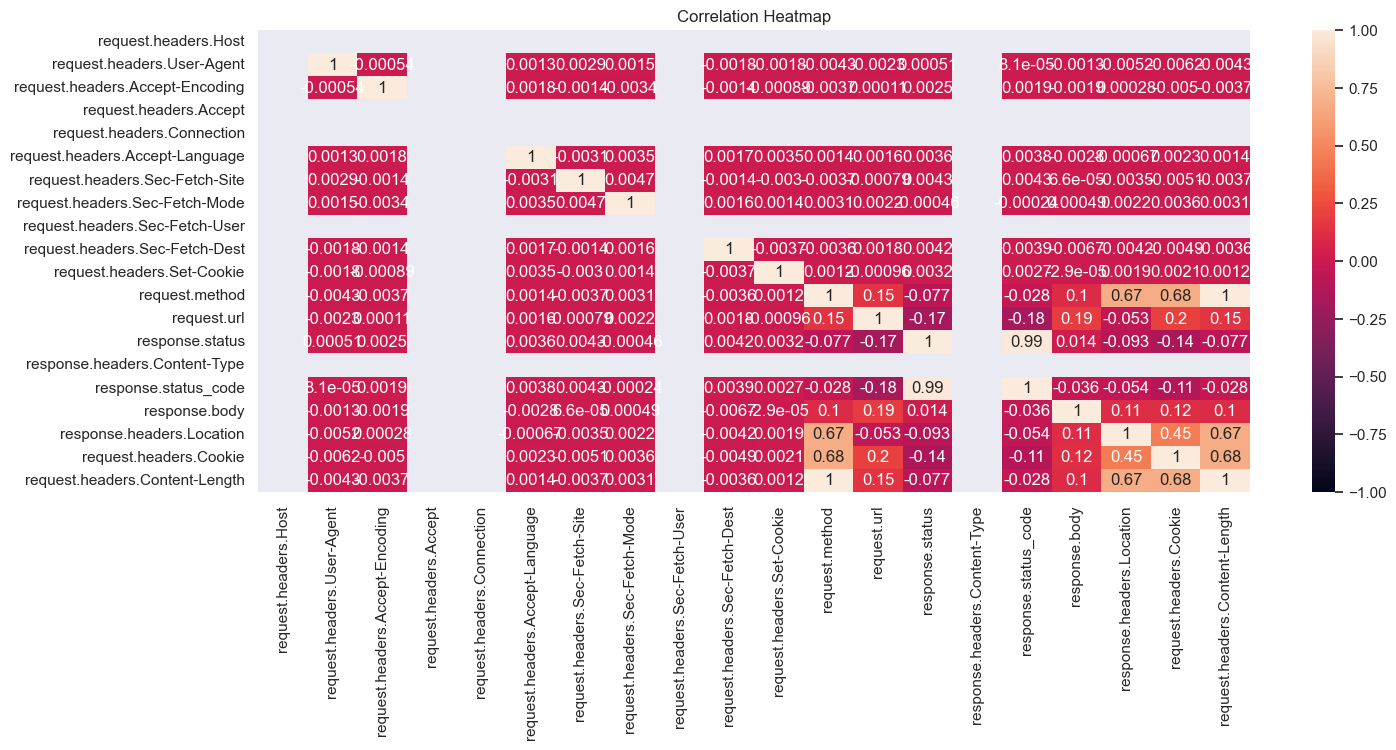

In [28]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

<AxesSubplot:ylabel='count'>

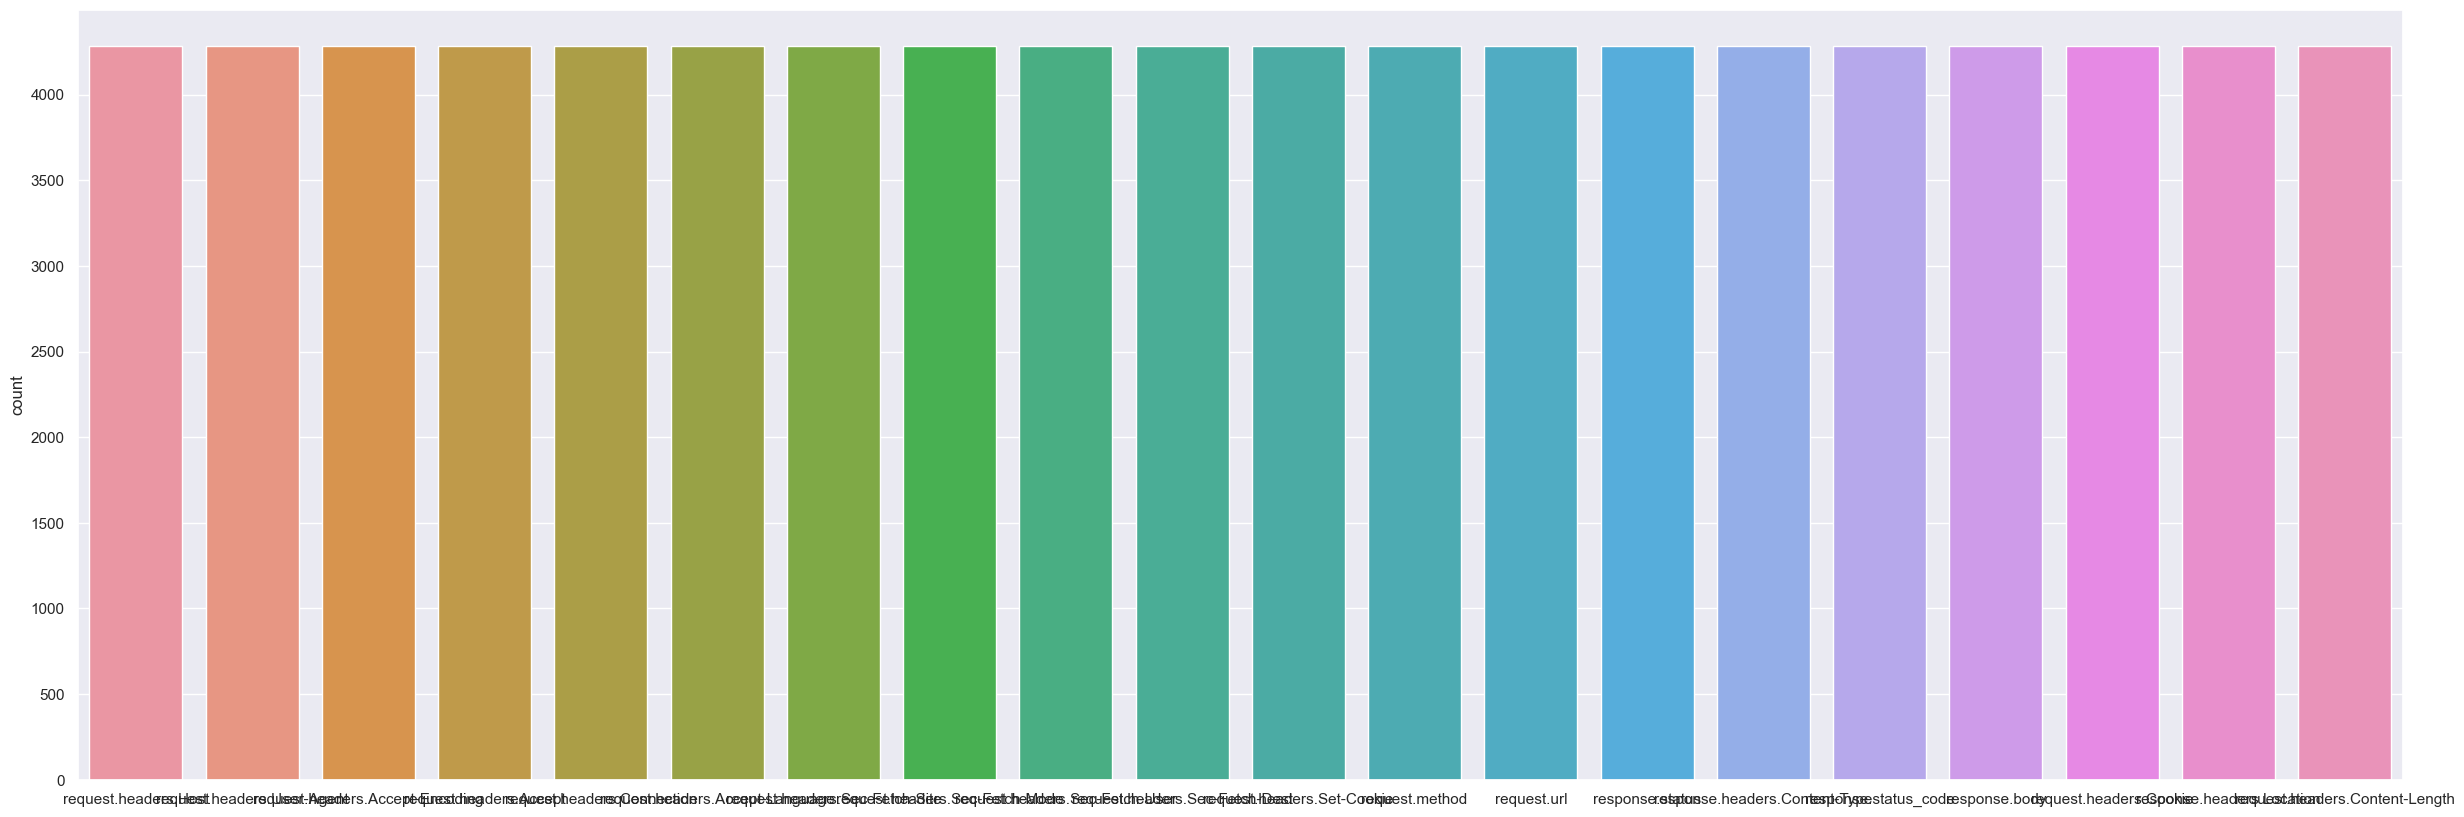

In [29]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(data=df1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


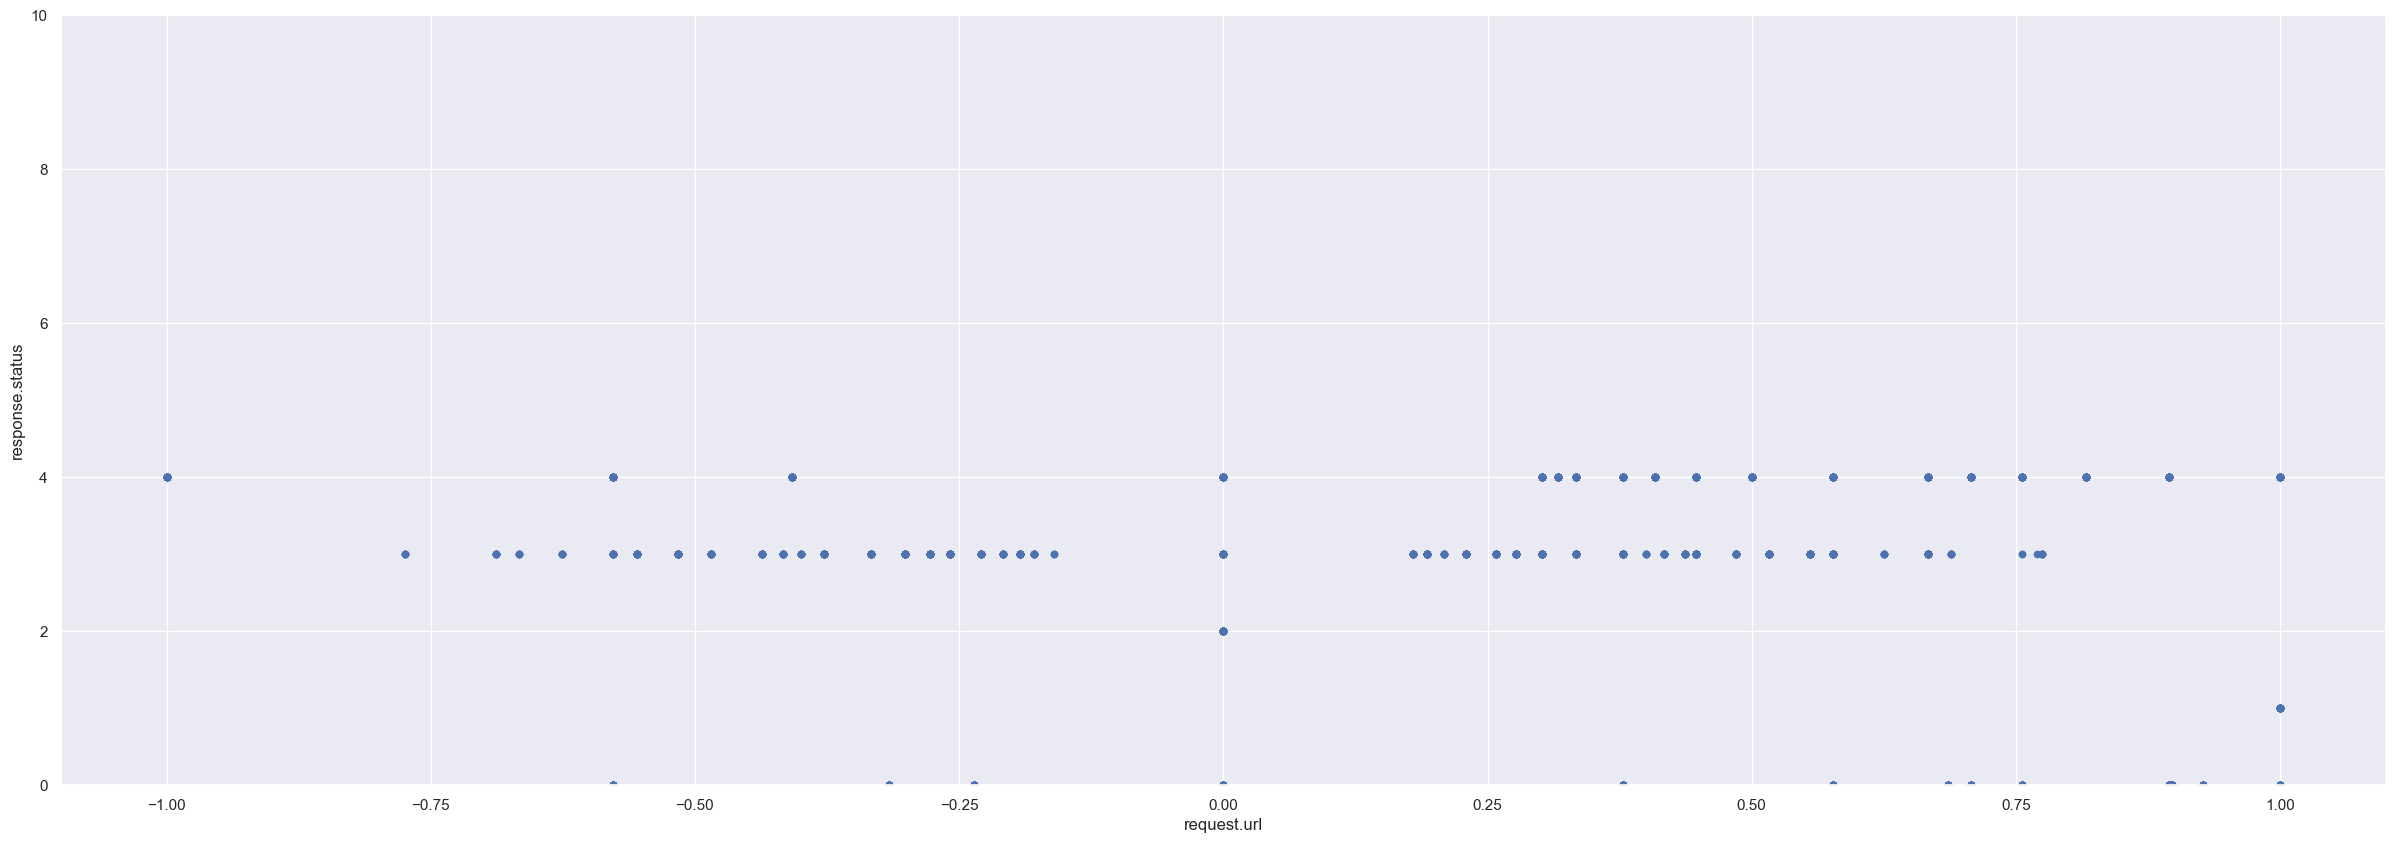

In [30]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df2['response.status'], df2[var]], axis=1)
data.plot.scatter(x=var, y='response.status', ylim=(0,10));

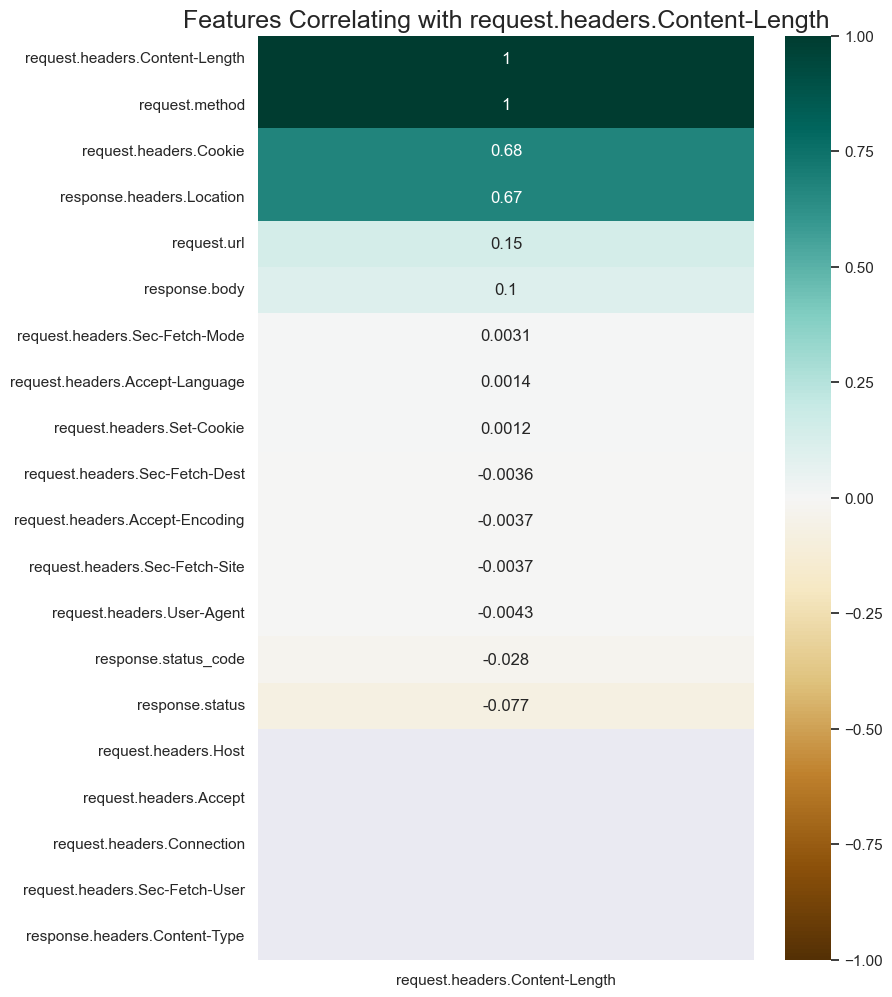

In [31]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df2.corr()[['request.headers.Content-Length']].sort_values(by='request.headers.Content-Length', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with request.headers.Content-Length', fontdict={'fontsize':18});

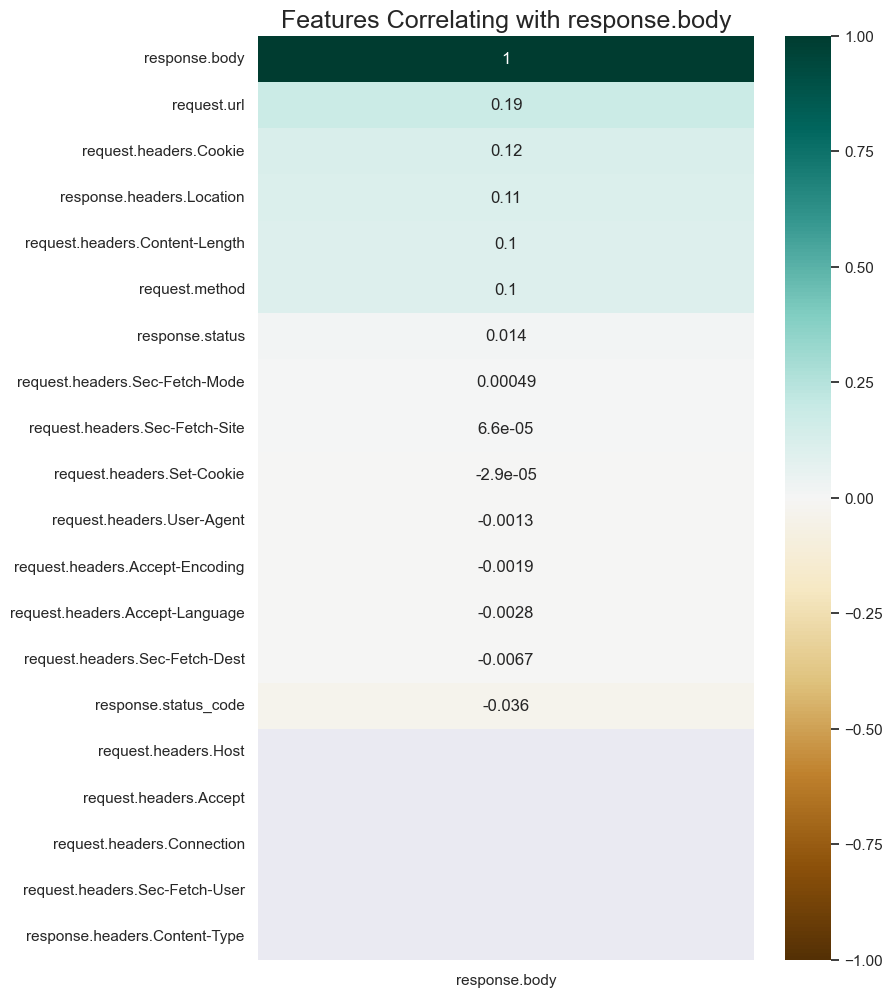

In [32]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df2.corr()[['response.body']].sort_values(by='response.body', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with response.body', fontdict={'fontsize':18});

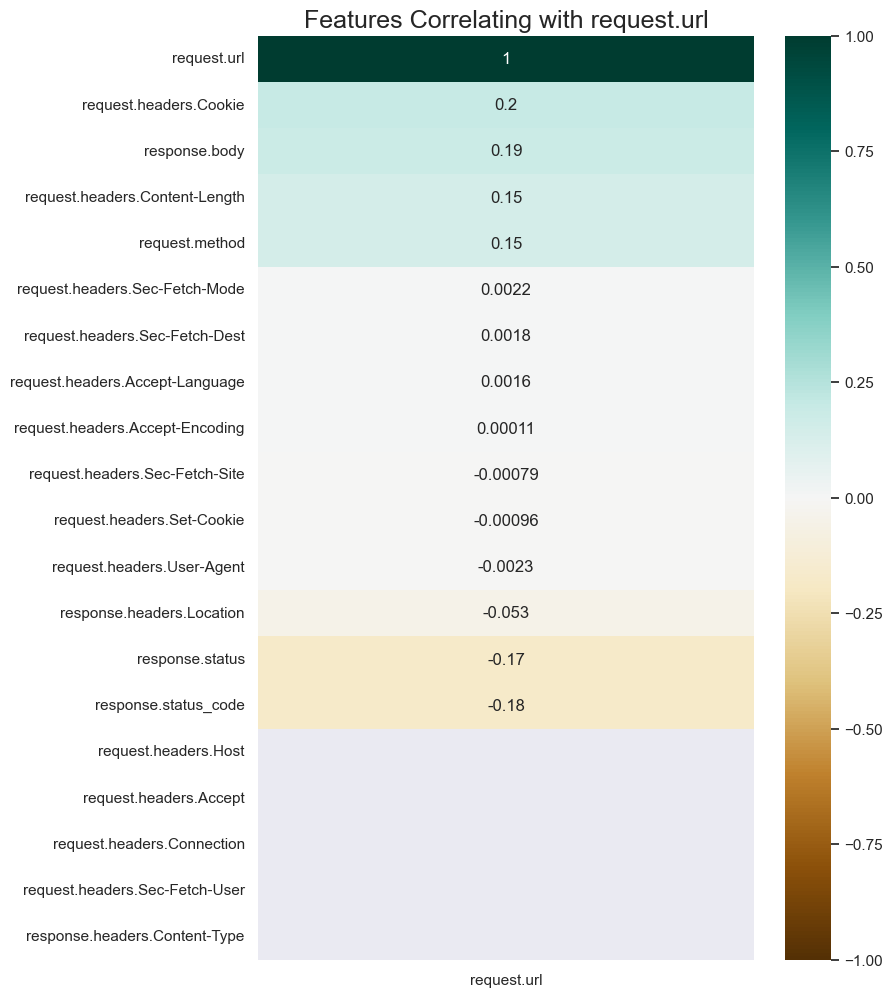

In [33]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df2.corr()[['request.url']].sort_values(by='request.url', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with request.url', fontdict={'fontsize':18});

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


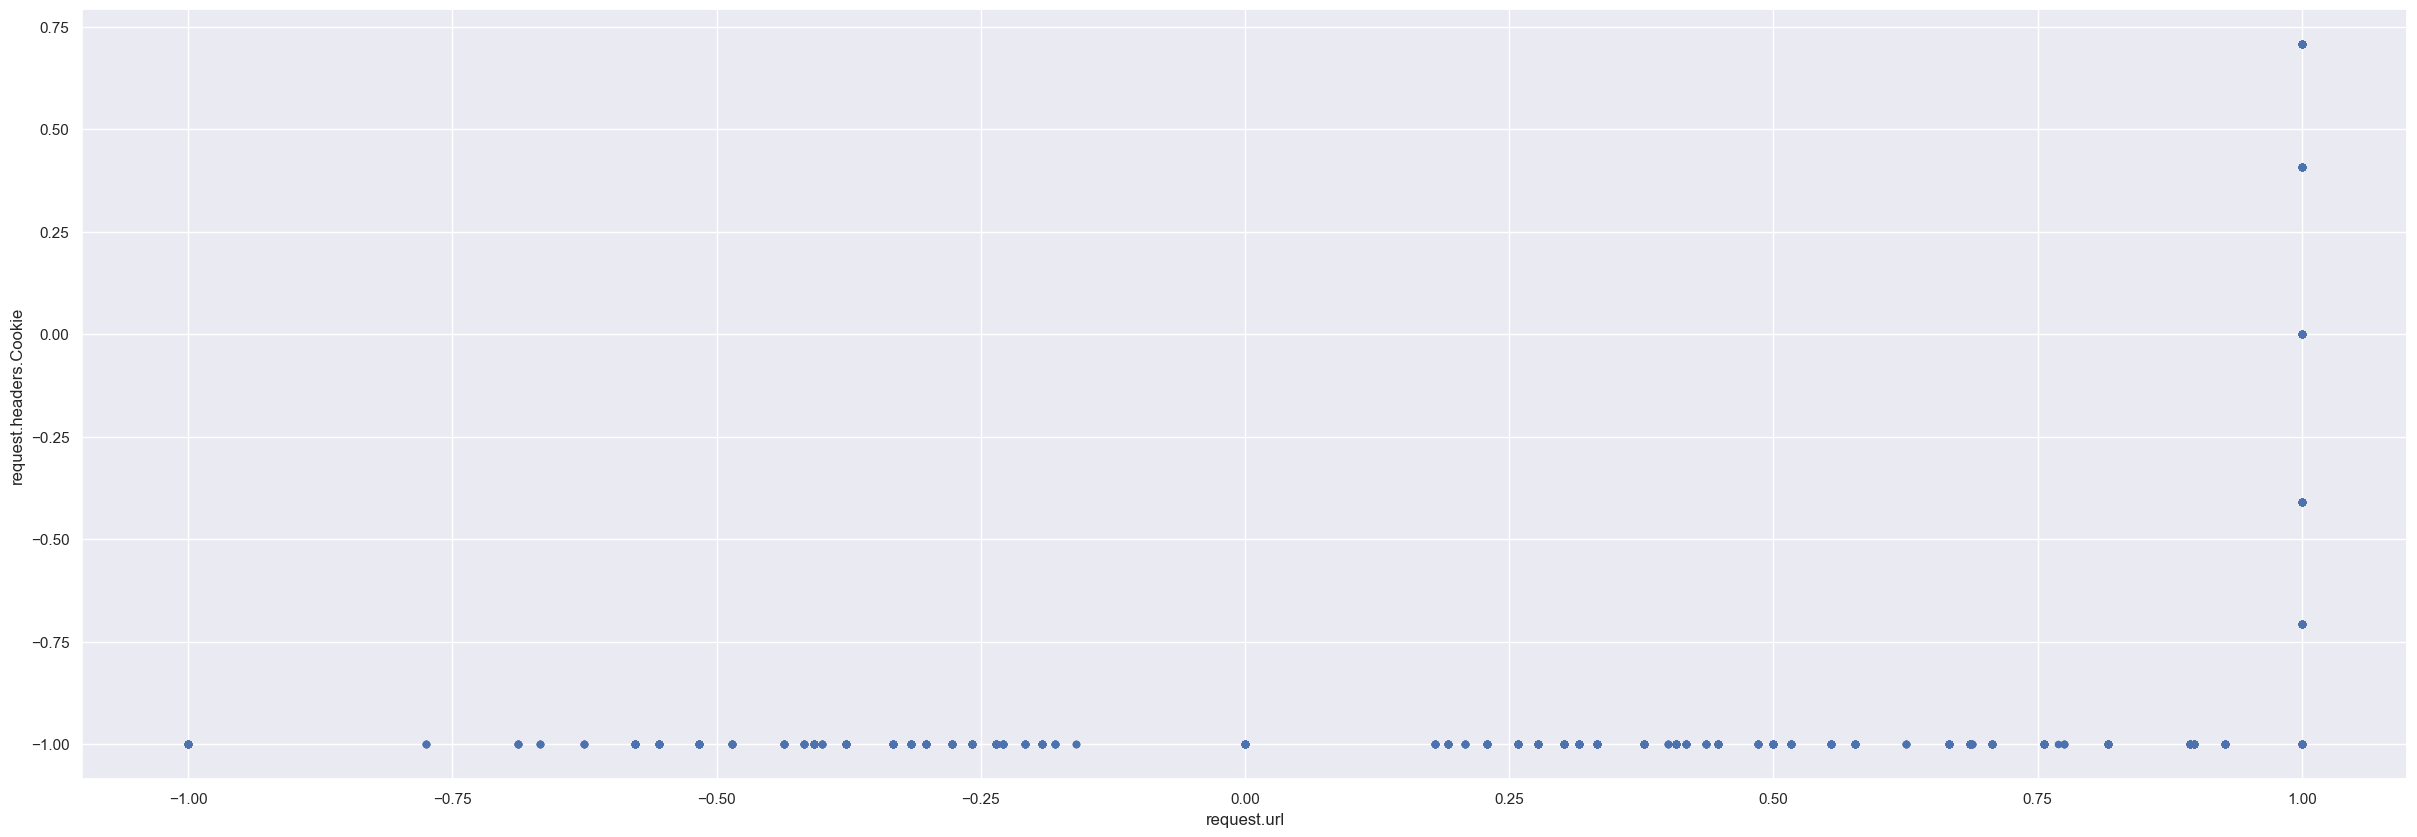

In [34]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df2['request.headers.Cookie'], df2[var]], axis=1)
data.plot.scatter(x=var, y='request.headers.Cookie');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


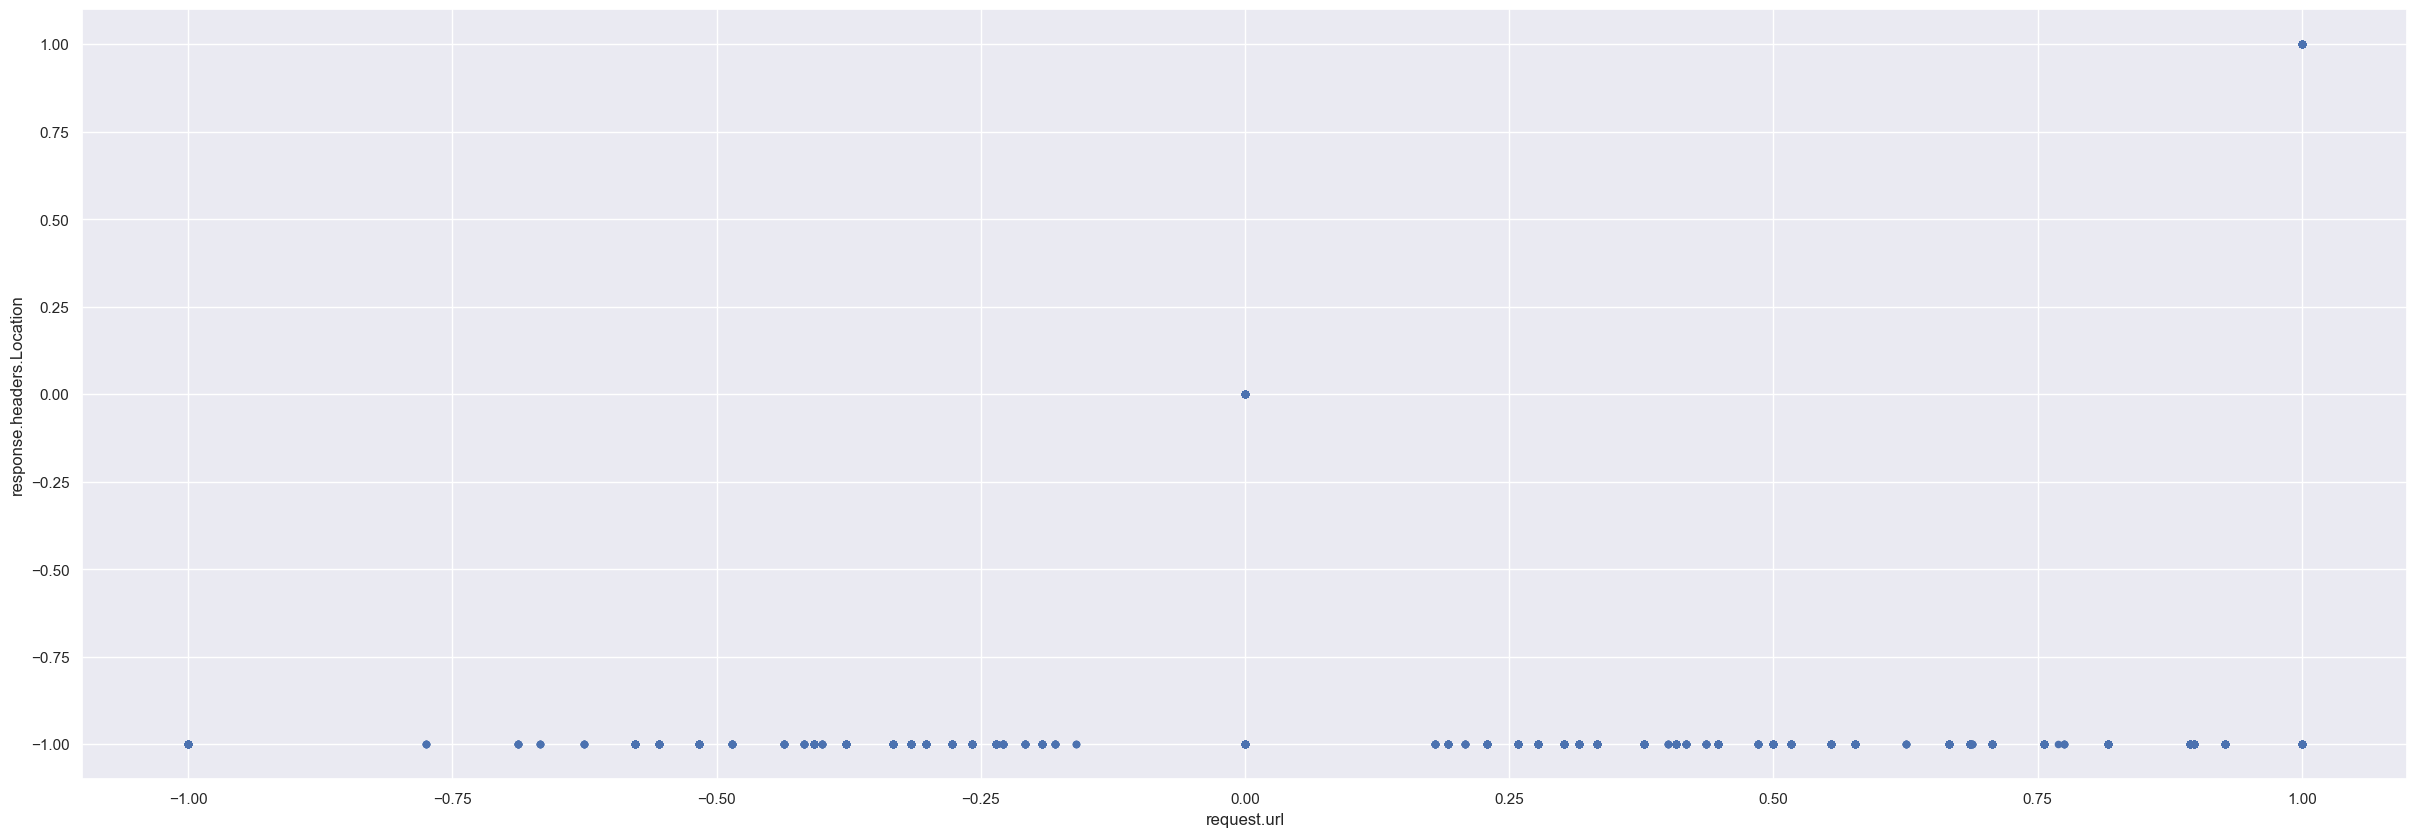

In [35]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df2['response.headers.Location'], df2[var]], axis=1)
data.plot.scatter(x=var, y='response.headers.Location');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


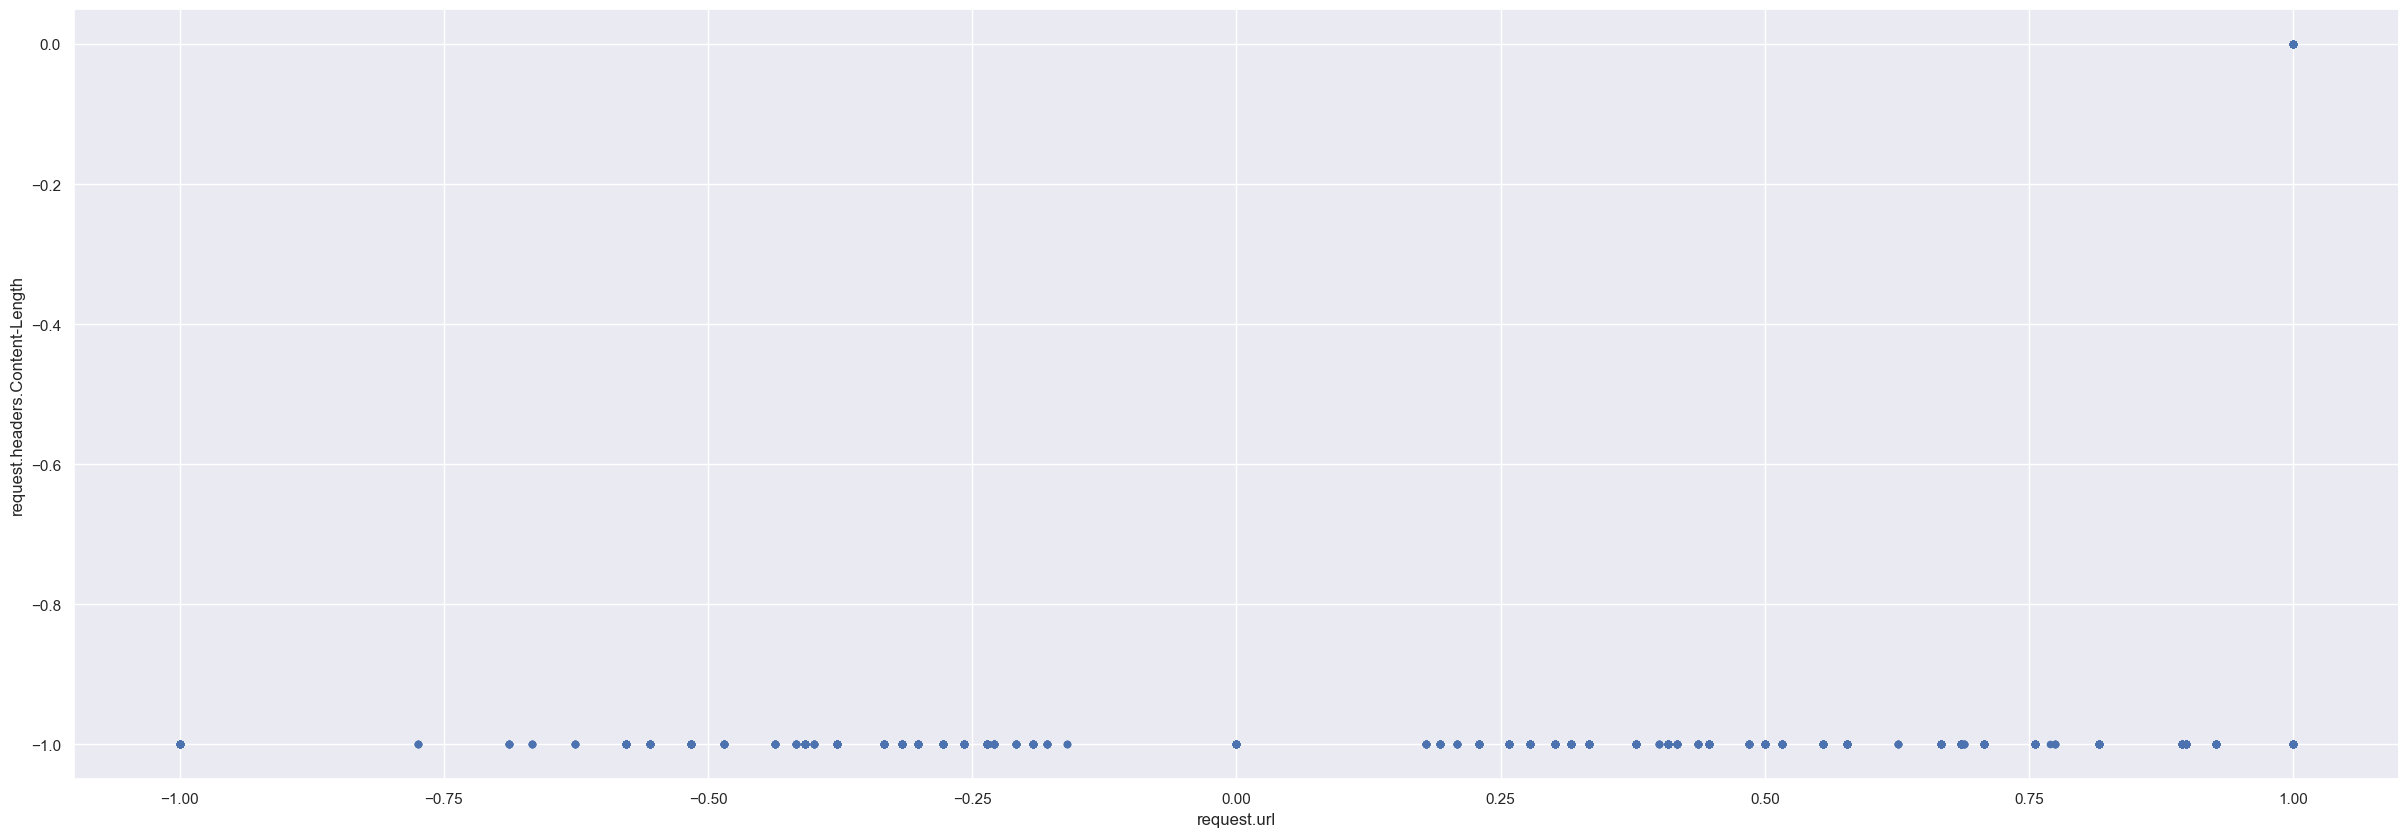

In [36]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df2['request.headers.Content-Length'], df2[var]], axis=1)
data.plot.scatter(x=var, y='request.headers.Content-Length');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


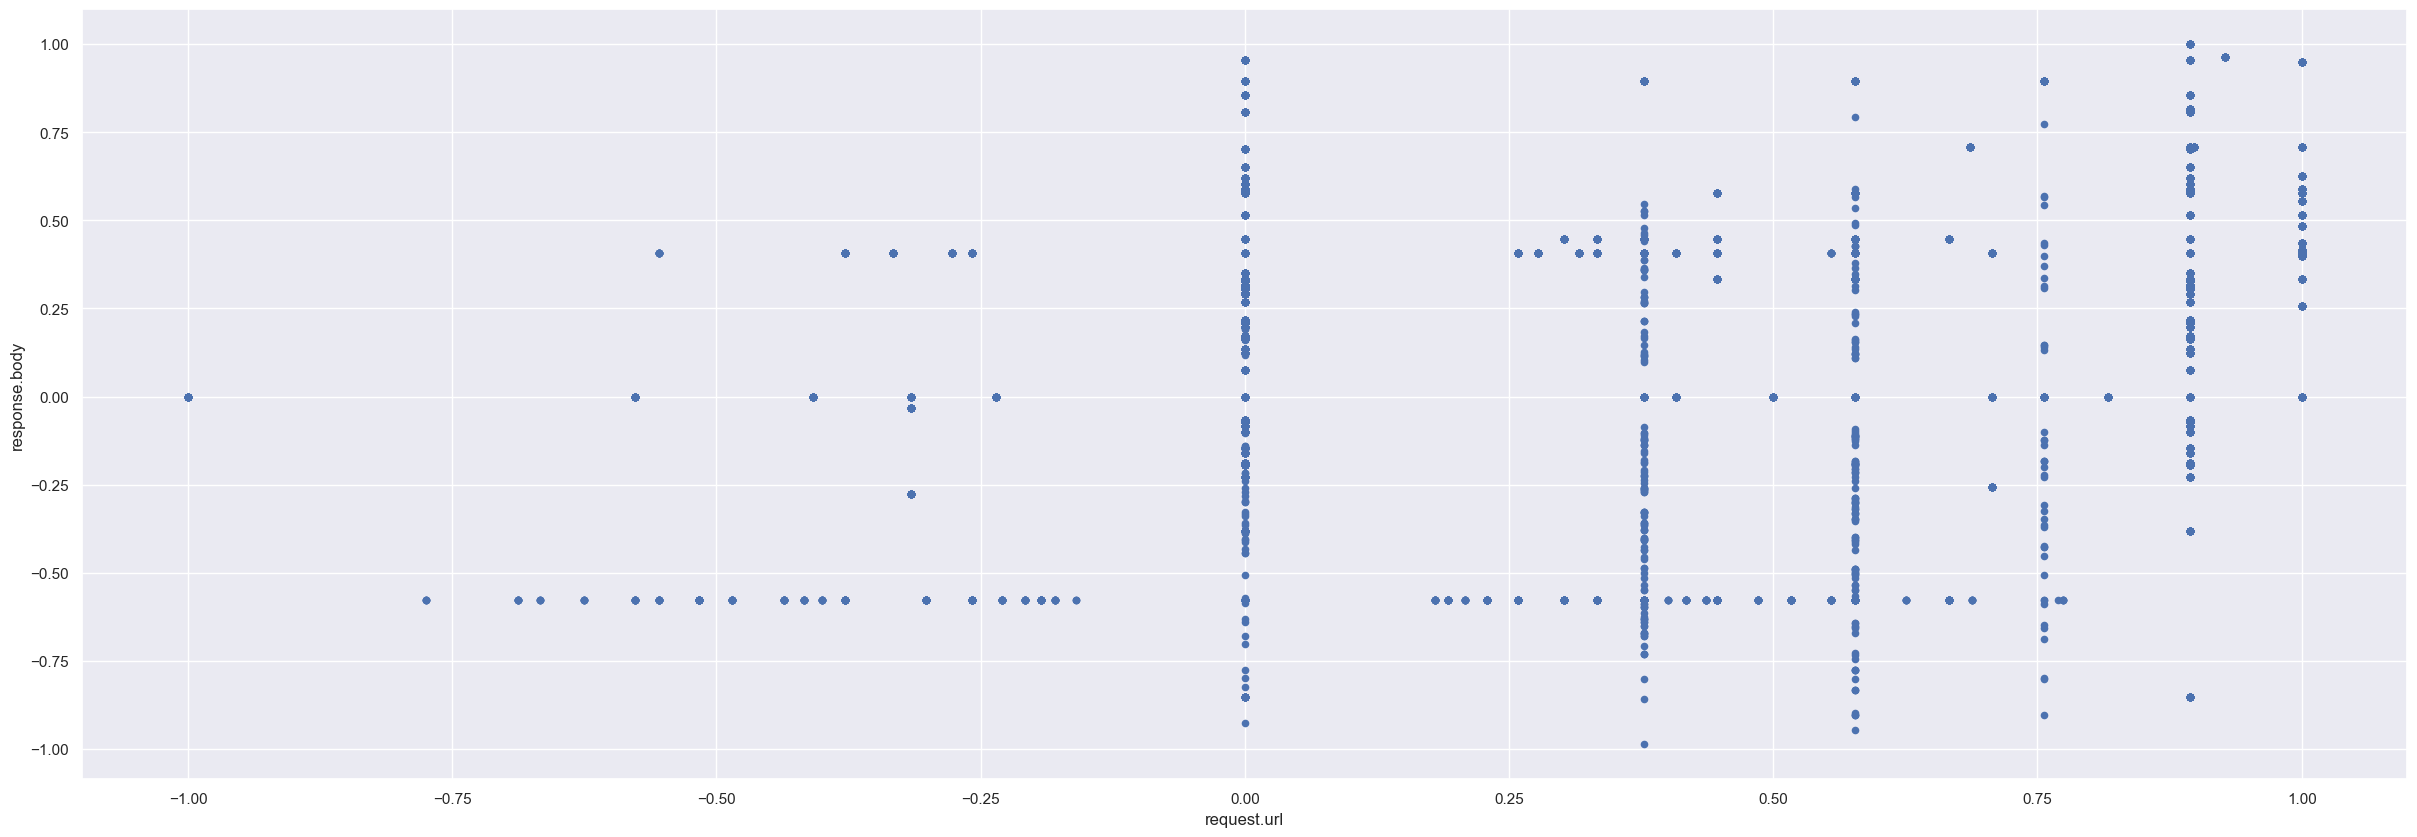

In [37]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df2['response.body'], df2[var]], axis=1)
data.plot.scatter(x=var, y='response.body');

## dataset 3:

In [38]:
with open(f'./dataset_3_train.json') as file:
    raw_ds = json.load(file)
df3 = pd.json_normalize(raw_ds, max_level=2)

In [39]:
df3 = fill(df3)

In [40]:
df3 = remove(df3)

In [41]:
df3 = vectorize_df(df3)

In [42]:
df3.head()

request.headers.Host  request.headers.User-Agent  \
0                     0                    0.577350   
1                     0                    0.258199   
2                     0                   -0.471405   
3                     0                    0.000000   
4                     0                    0.000000   

   request.headers.Accept-Encoding  request.headers.Accept  \
0                                0                       0   
1                                1                       0   
2                                1                       0   
3                                1                       0   
4                                1                       0   

   request.headers.Connection  request.method  request.url  response.status  \
0                           0               0     0.666667                3   
1                           0               0     0.480384                1   
2                           0               0     0.816497                0   
3                           0               0     0.500000                0   
4                           0               0     0.554700                0   

   response.headers.Content-Type  response.status_code  response.body  \
0                           -1.0                   400       0.816497   
1                           -1.0                   302      -1.000000   
2                           -1.0                   200      -1.000000   
3                           -1.0                   200      -0.115470   
4                           -1.0                   200      -1.000000   

   request.headers.Accept-Language  request.headers.Sec-Fetch-Site  \
0                                0                               0   
1                                4                               1   
2                                2                               1   
3                                3                               1   
4                                1                               1   

   request.headers.Sec-Fetch-Mode  request.headers.Sec-Fetch-User  \
0                               0                               1   
1                               1                               0   
2                               2                               0   
3                               1                               0   
4                               1                               0   

   request.headers.Sec-Fetch-Dest  request.headers.Set-Cookie  \
0                               0                   -1.000000   
1                               1                   -0.363803   
2                               1                   -0.755929   
3                               1                   -0.654654   
4                               1                   -0.700140   

   response.headers.Location  request.headers.Content-Length  \
0                       -1.0                            -1.0   
1                        0.0                            -1.0   
2                       -1.0                            -1.0   
3                       -1.0                            -1.0   
4                       -1.0                            -1.0   

   request.headers.Cookie response.headers.Set-Cookie attack_type    label  
0                    -1.0                        None      Benign   Benign  
1                    -1.0                        None         XSS  Malware  
2                    -1.0                        None      Benign   Benign  
3                    -1.0                        None      Benign   Benign  
4                    -1.0                        None      Benign   Benign

In [43]:
df3

request.headers.Host  request.headers.User-Agent  \
0                          0                    0.577350   
1                          0                    0.258199   
2                          0                   -0.471405   
3                          0                    0.000000   
4                          0                    0.000000   
...                      ...                         ...   
144495                     0                    0.577350   
144496                     0                    0.000000   
144497                     0                   -0.229416   
144498                     0                    0.000000   
144499                     0                    0.000000   

        request.headers.Accept-Encoding  request.headers.Accept  \
0                                     0                       0   
1                                     1                       0   
2                                     1                       0   
3                                     1                       0   
4                                     1                       0   
...                                 ...                     ...   
144495                                0                       0   
144496                                1                       0   
144497                                1                       0   
144498                                1                       0   
144499                                1                       0   

        request.headers.Connection  request.method  request.url  \
0                                0               0     0.666667   
1                                0               0     0.480384   
2                                0               0     0.816497   
3                                0               0     0.500000   
4                                0               0     0.554700   
...                            ...             ...          ...   
144495                           0               0     0.554700   
144496                           0               0     0.632456   
144497                           0               0     0.316228   
144498                           0               0    -0.235702   
144499                           0               0     0.894427   

        response.status  response.headers.Content-Type  response.status_code  \
0                     3                           -1.0                   400   
1                     1                           -1.0                   302   
2                     0                           -1.0                   200   
3                     0                           -1.0                   200   
4                     0                           -1.0                   200   
...                 ...                            ...                   ...   
144495                3                           -1.0                   400   
144496                5                           -1.0                   404   
144497                5                           -1.0                   404   
144498                4                           -1.0                   401   
144499                0                           -1.0                   200   

        response.body  request.headers.Accept-Language  \
0            0.816497                                0   
1           -1.000000                                4   
2           -1.000000                                2   
3           -0.115470                                3   
4           -1.000000                                1   
...               ...                              ...   
144495       0.816497                                0   
144496       0.408248                                3   
144497       0.000000                                2   
144498       0.408248                                1   
144499      -1.000000                                1   

        request.hea

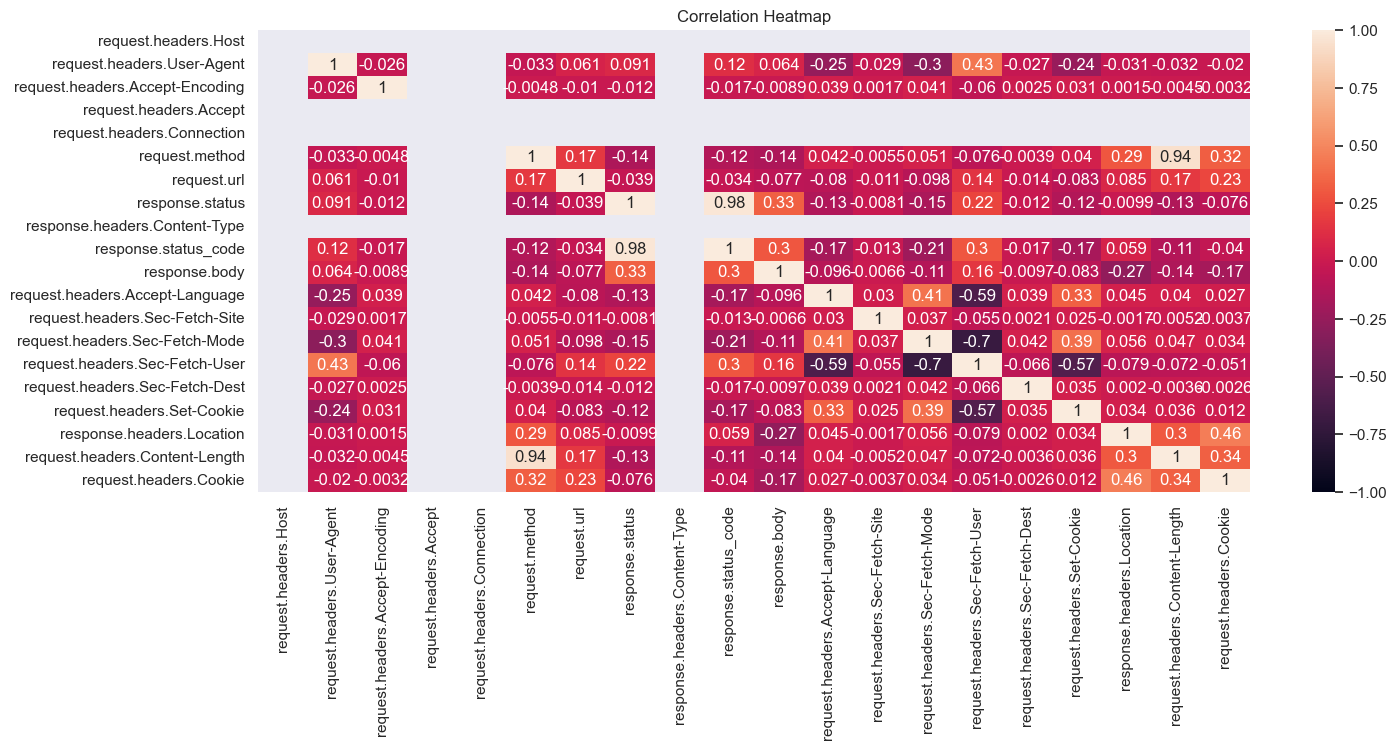

In [44]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


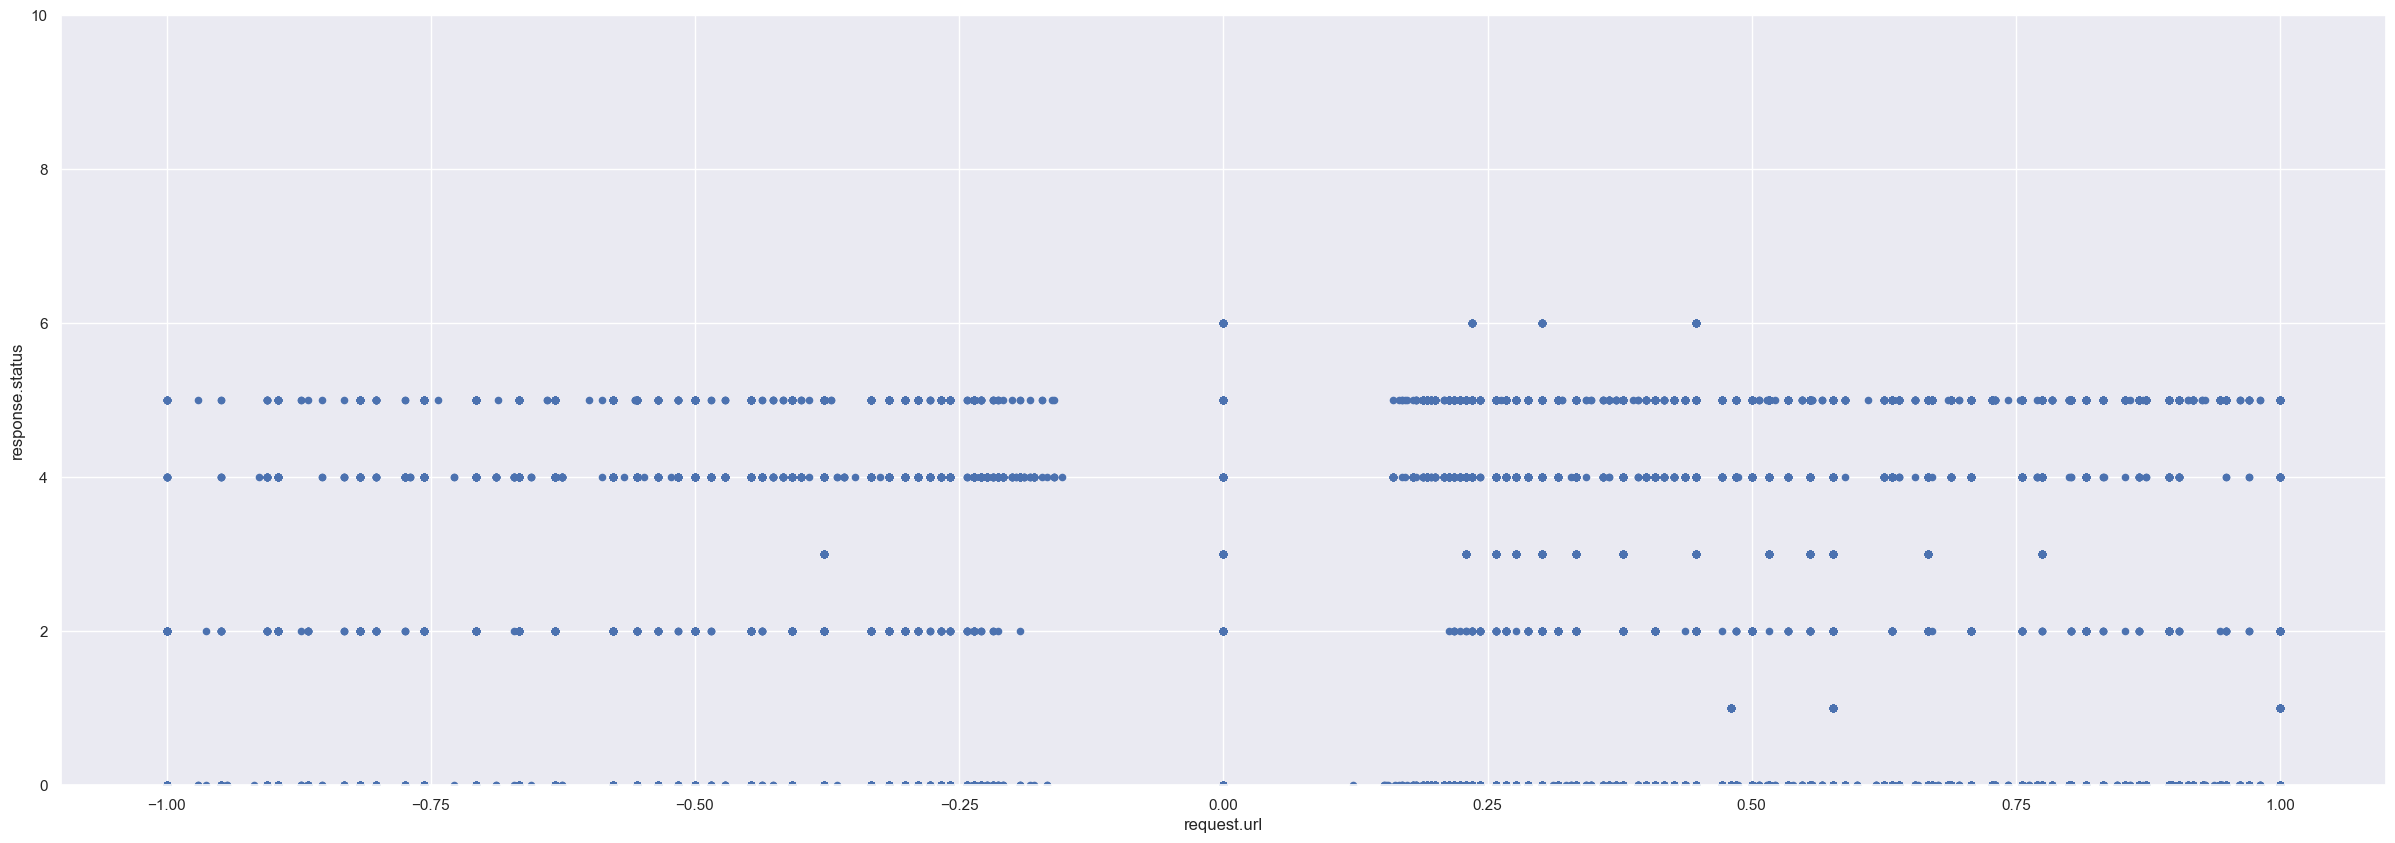

In [45]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df3['response.status'], df3[var]], axis=1)
data.plot.scatter(x=var, y='response.status', ylim=(0,10));

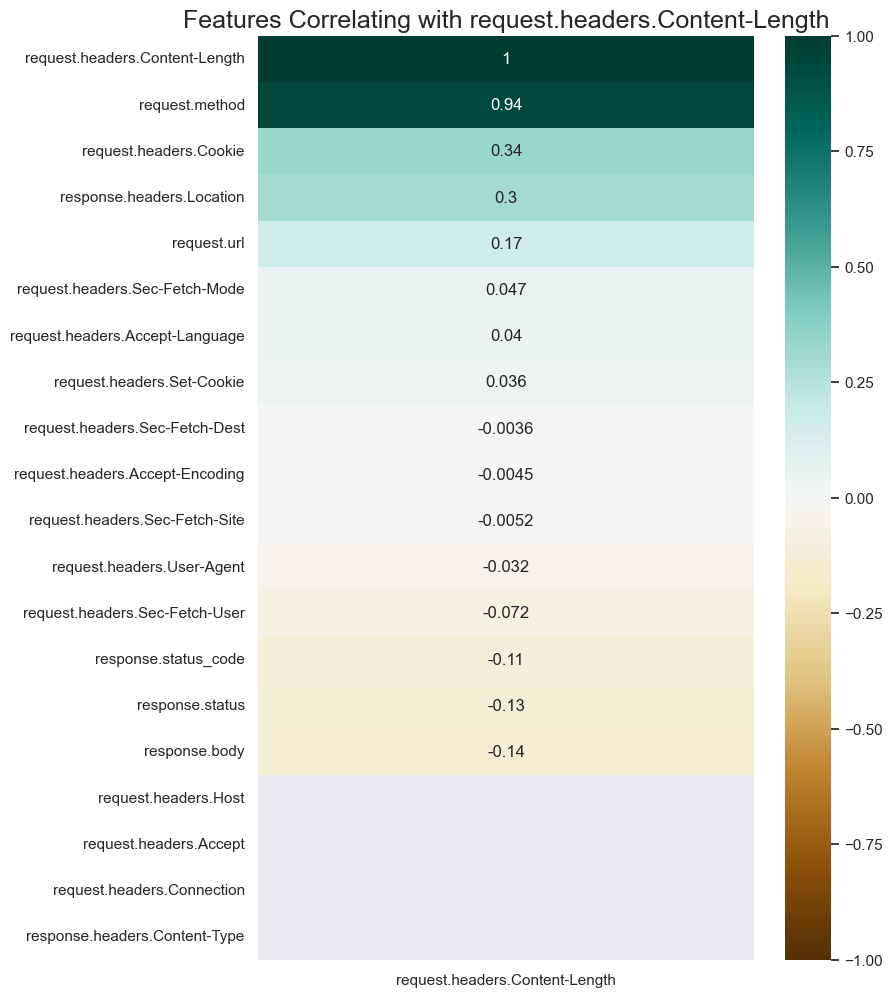

In [46]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df3.corr()[['request.headers.Content-Length']].sort_values(by='request.headers.Content-Length', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with request.headers.Content-Length', fontdict={'fontsize':18});

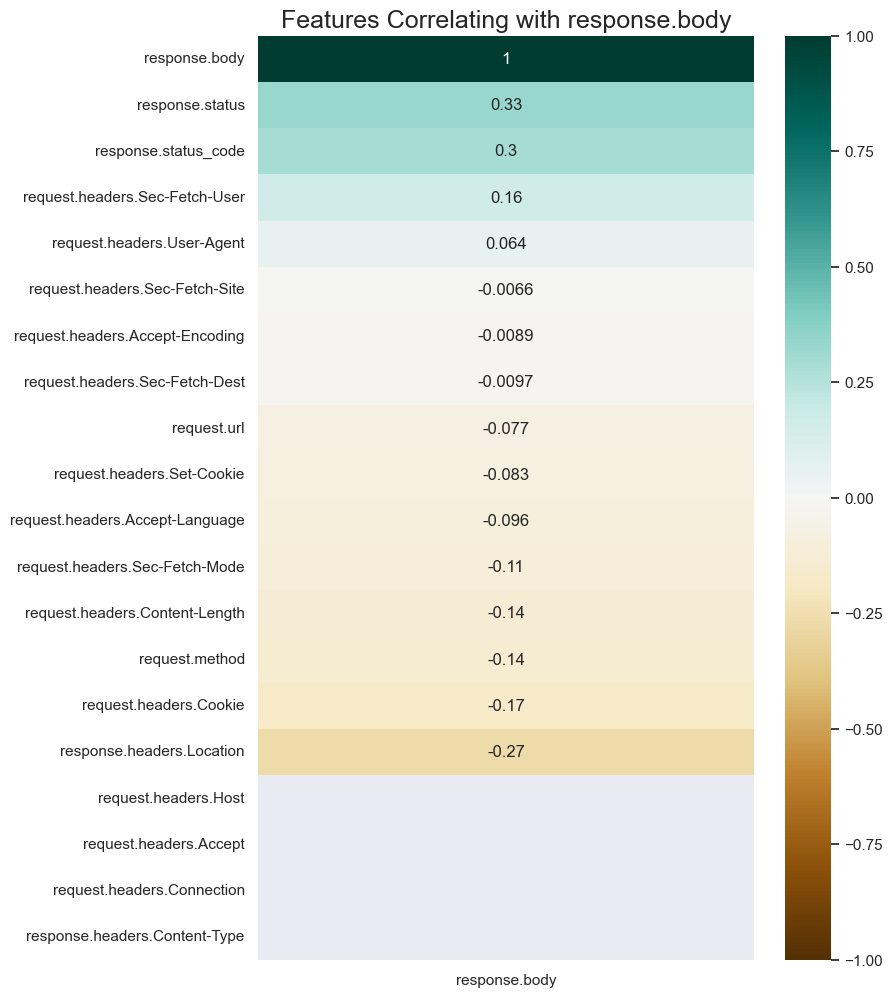

In [47]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df3.corr()[['response.body']].sort_values(by='response.body', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with response.body', fontdict={'fontsize':18});

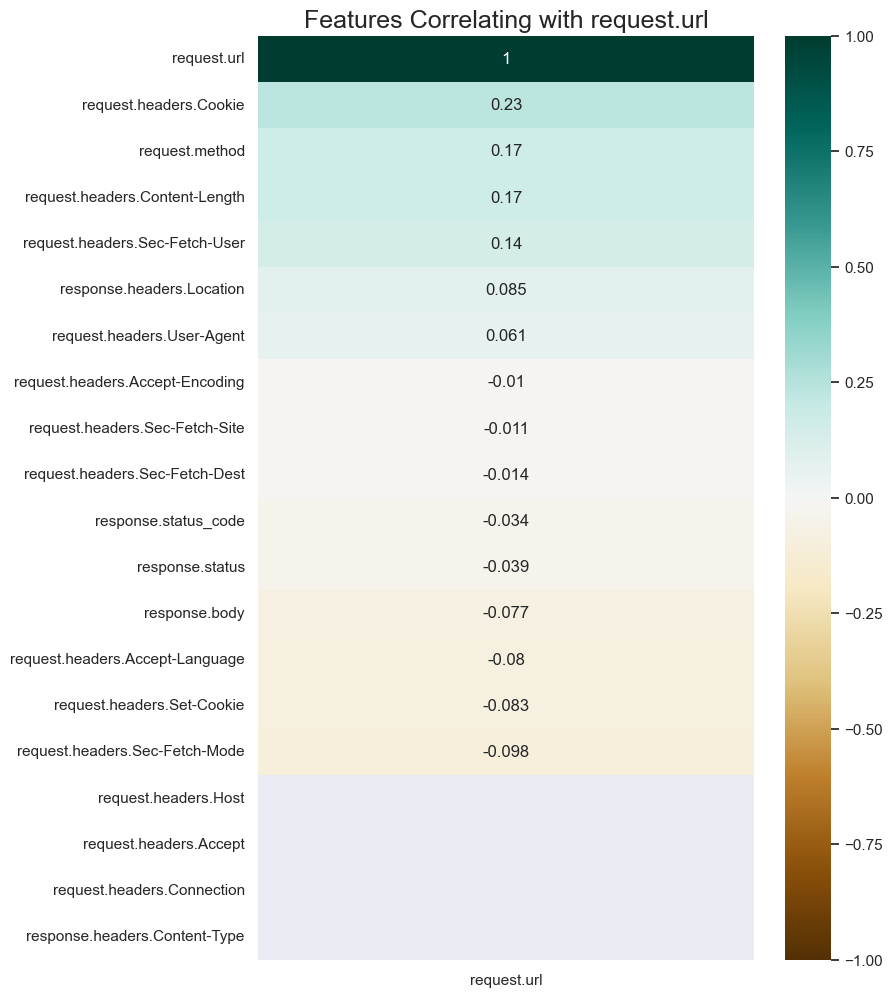

In [48]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df3.corr()[['request.url']].sort_values(by='request.url', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with request.url', fontdict={'fontsize':18});

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


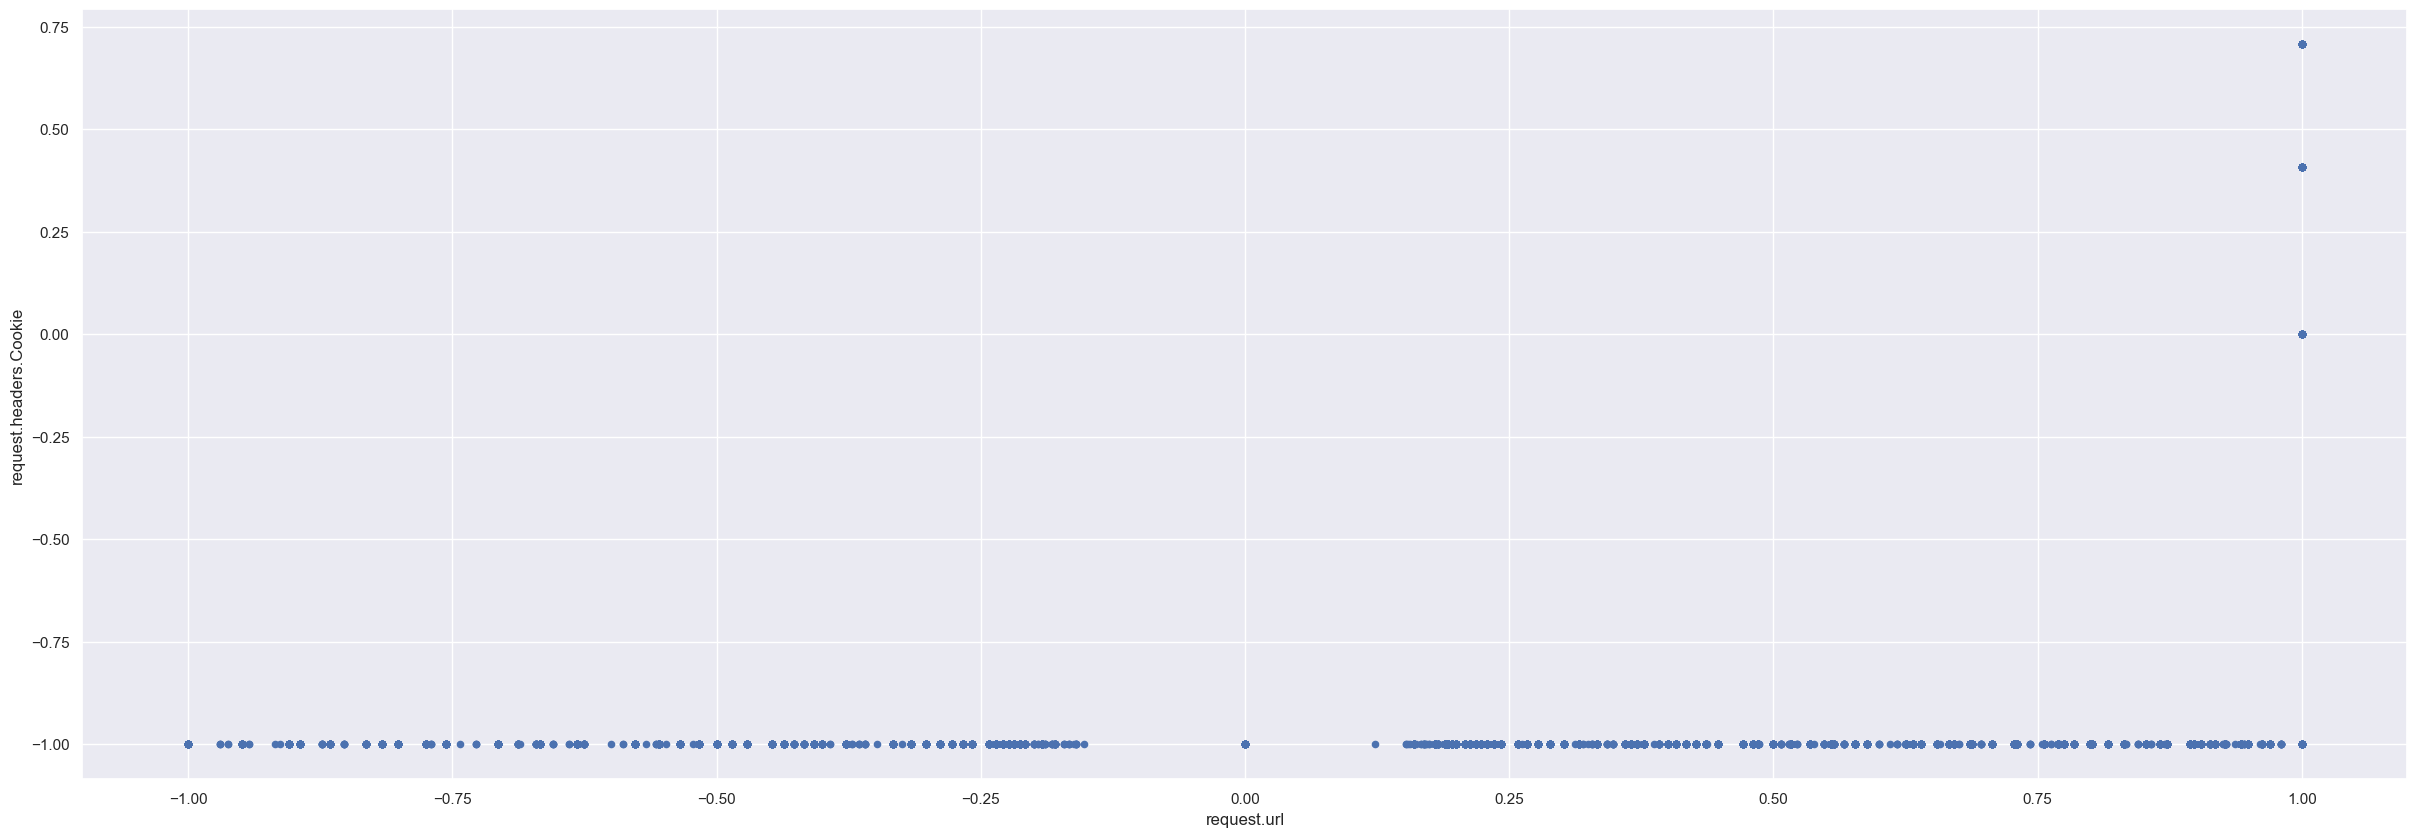

In [49]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df3['request.headers.Cookie'], df3[var]], axis=1)
data.plot.scatter(x=var, y='request.headers.Cookie');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


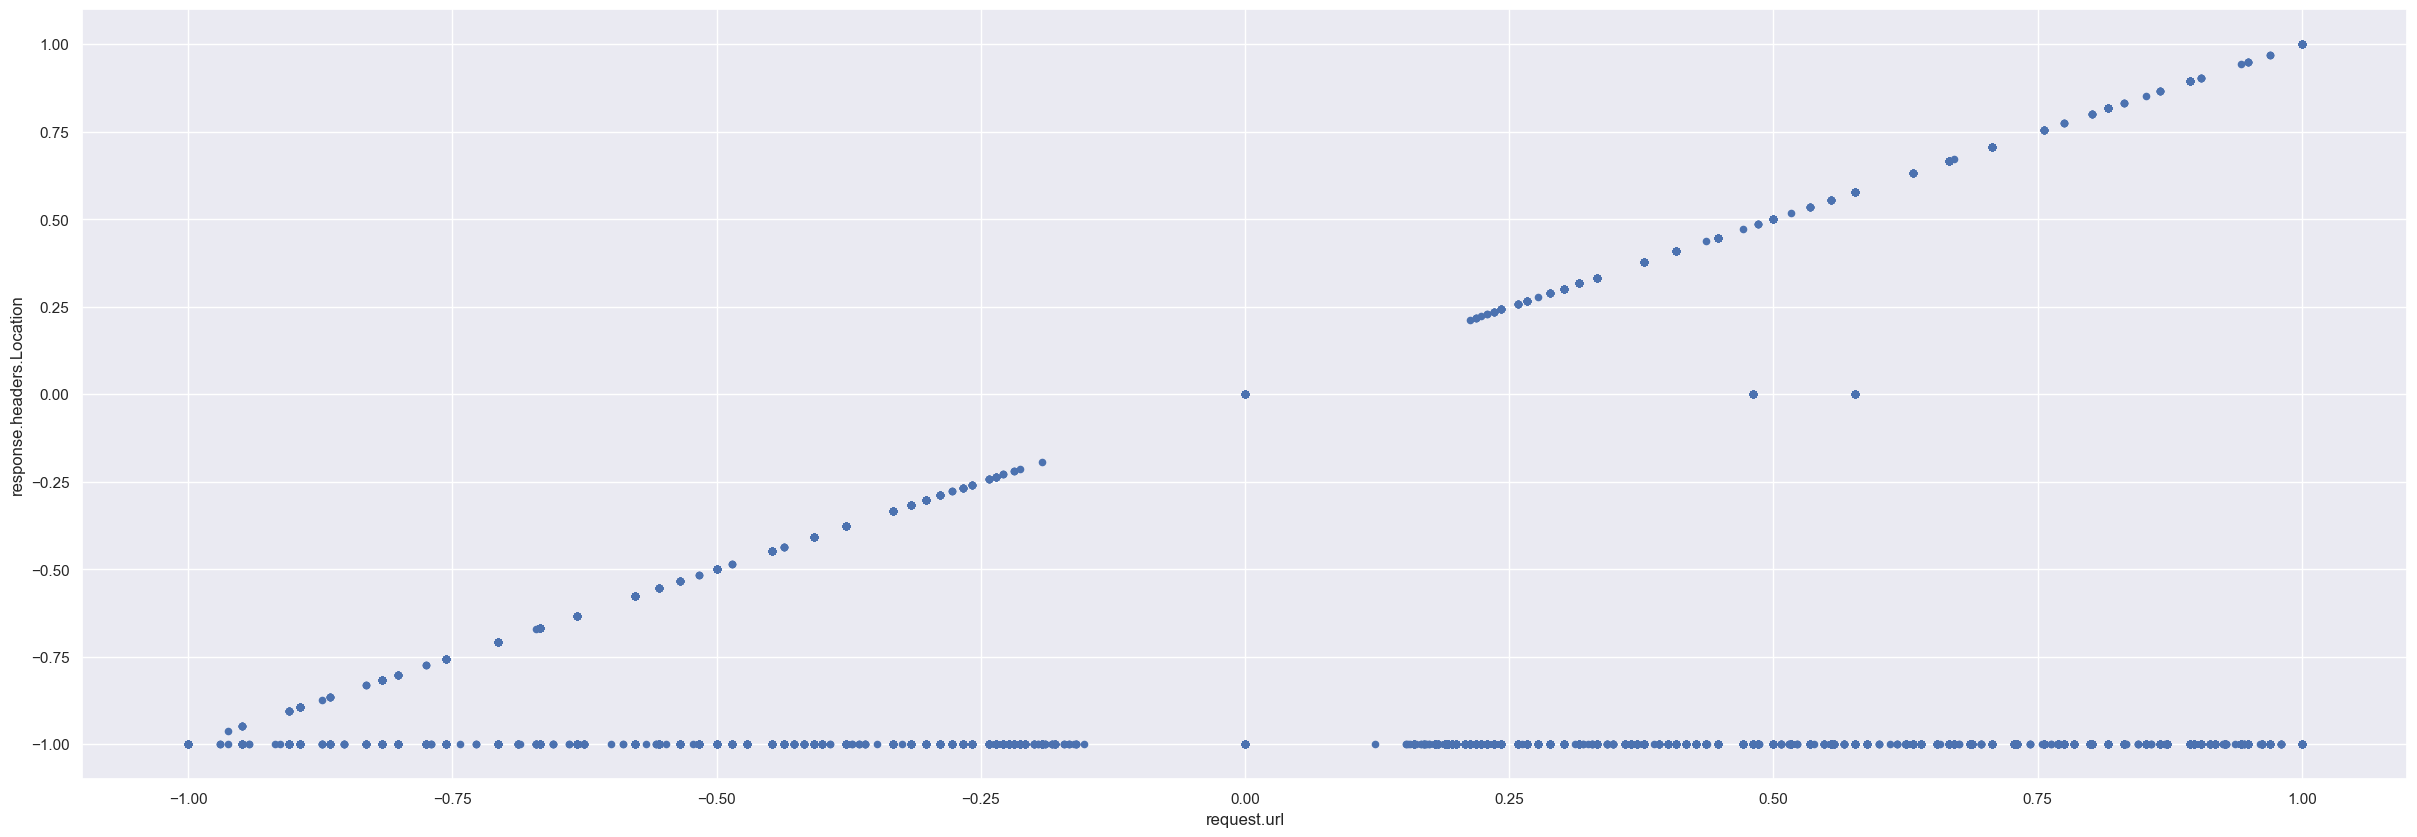

In [50]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df3['response.headers.Location'], df3[var]], axis=1)
data.plot.scatter(x=var, y='response.headers.Location');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


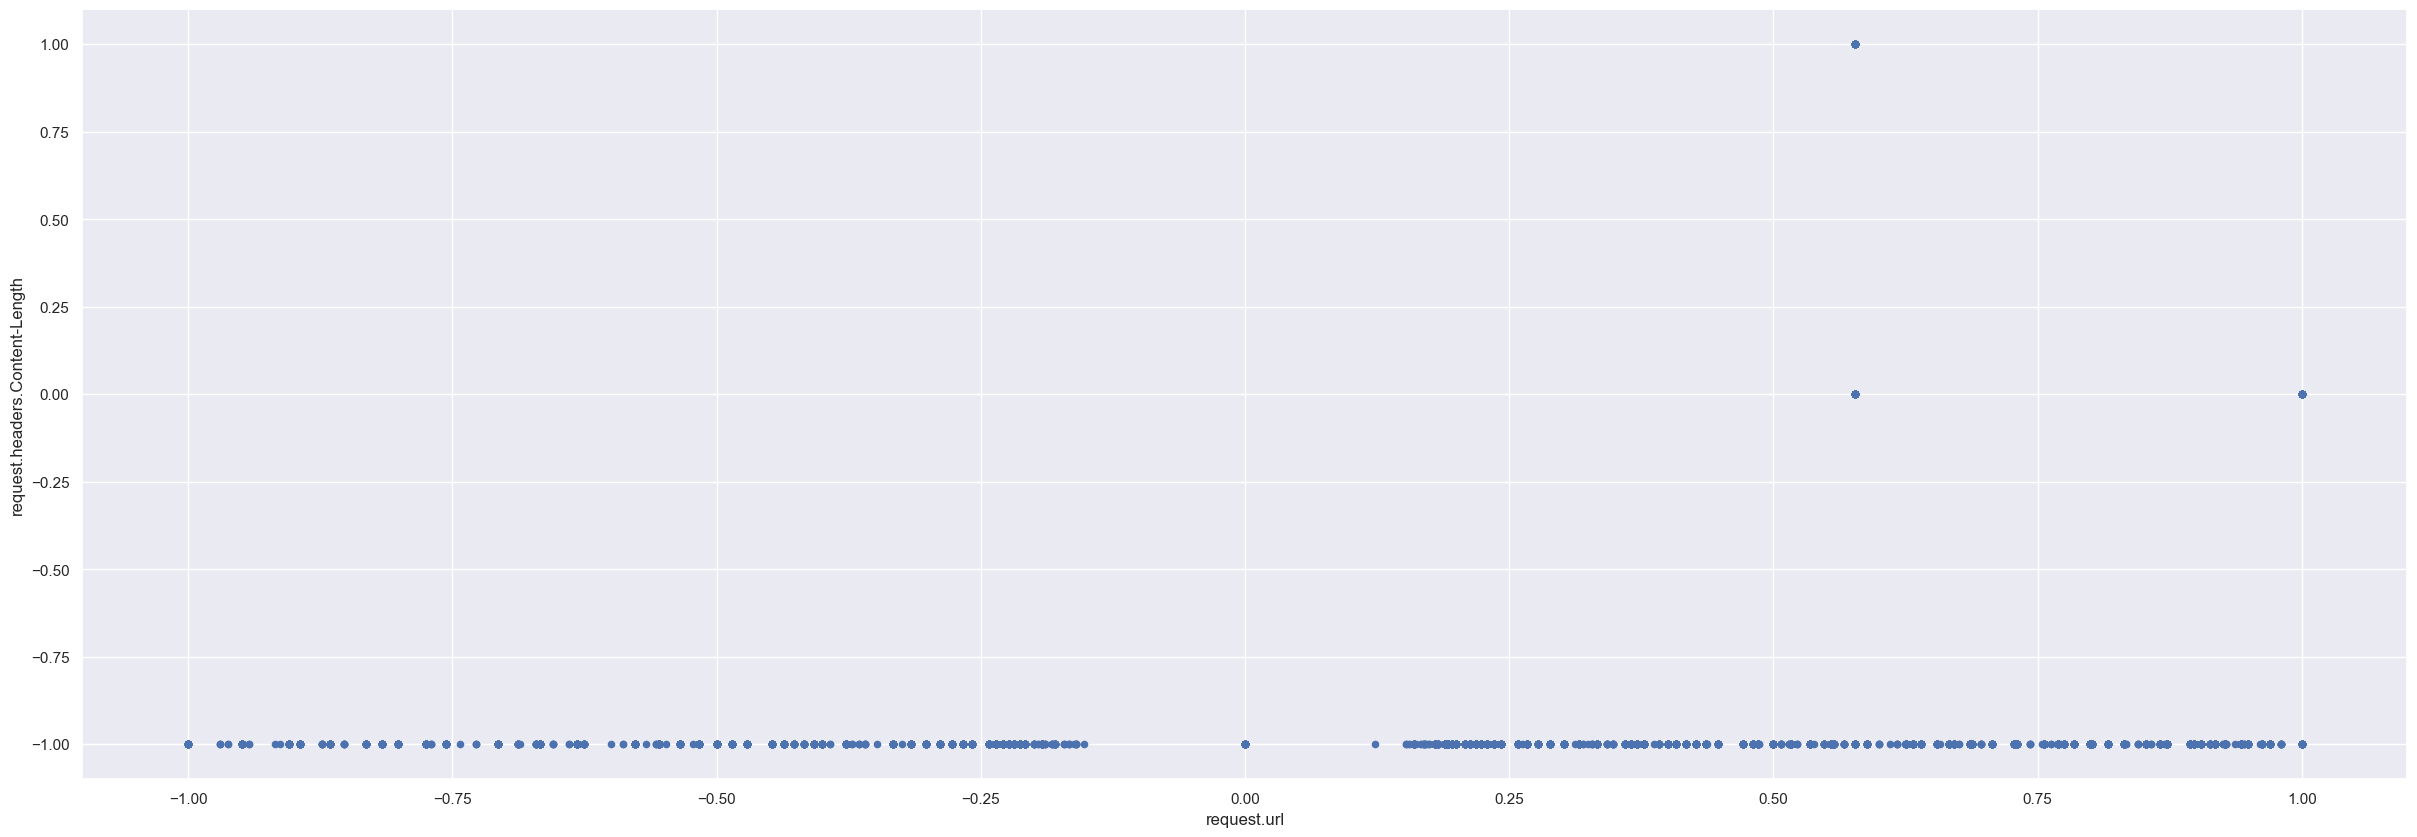

In [51]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df3['request.headers.Content-Length'], df3[var]], axis=1)
data.plot.scatter(x=var, y='request.headers.Content-Length');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


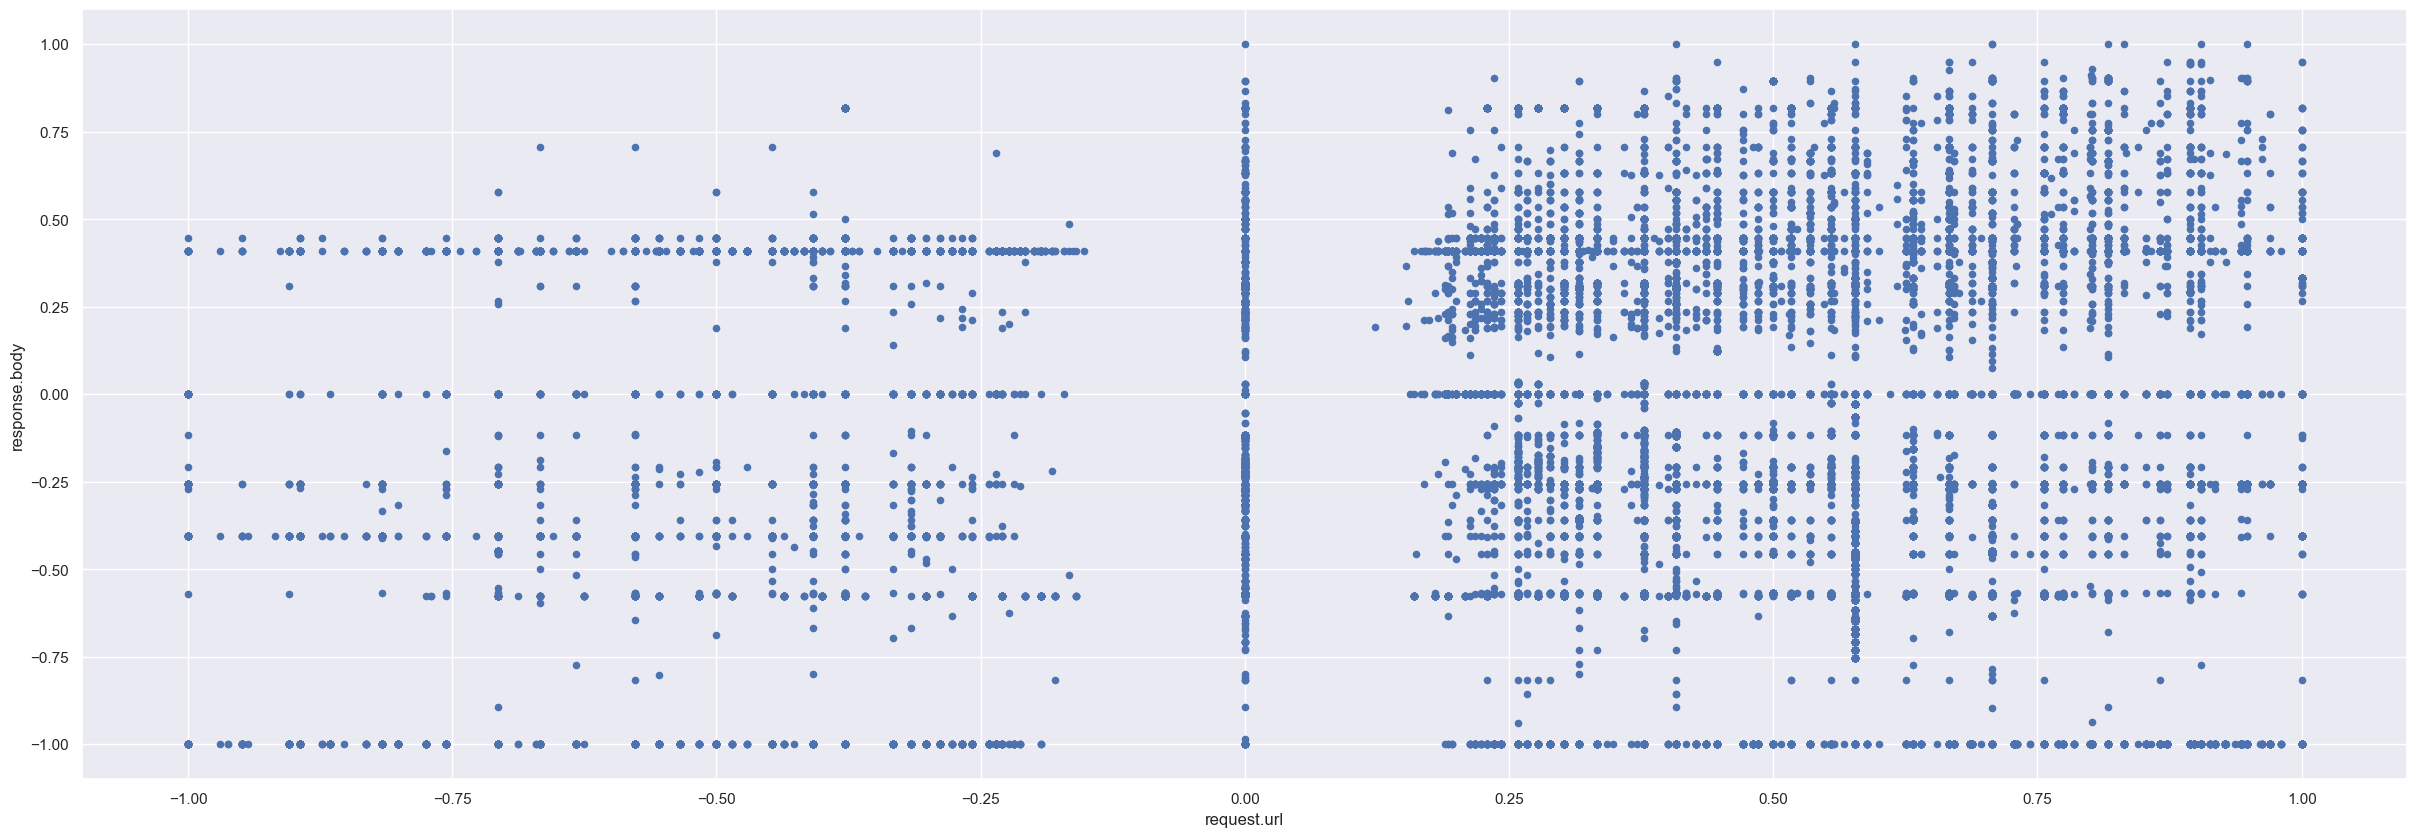

In [52]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df3['response.body'], df3[var]], axis=1)
data.plot.scatter(x=var, y='response.body');

## dataset 4:

In [53]:
with open(f'./dataset_4_train.json') as file:
    raw_ds = json.load(file)
df4 = pd.json_normalize(raw_ds, max_level=2)

In [54]:
df4.head()

request.headers.Host                         request.headers.User-Agent  \
0       127.0.0.1:5000  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1       127.0.0.1:5000  Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKi...   
2       127.0.0.1:5000                             python-requests/2.28.1   
3       127.0.0.1:5000  Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko...   
4       127.0.0.1:5000  Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...   

    request.headers.Accept-Encoding request.headers.Accept  \
0                 gzip, deflate, br                    */*   
1                 gzip, deflate, br                    */*   
2                     gzip, deflate                    */*   
3                 gzip, deflate, br                    */*   
4  x-gzip, x-deflate, gzip, deflate                    */*   

  request.headers.Connection request.headers.Sec-Ch-Ua-Mobile  \
0                 keep-alive                               ?0   
1                 keep-alive                               ?0   
2                 keep-alive                              NaN   
3                 keep-alive                               ?0   
4                 keep-alive                               ?1   

  request.headers.Accept-Language request.headers.Sec-Fetch-Site  \
0                           de-CH                           none   
1                  en-US,en;q=0.5                           none   
2                             NaN                            NaN   
3                              de                           none   
4                           de-CH                           none   

  request.headers.Sec-Fetch-Mode request.headers.Cache-Control  \
0                    same-origin                      no-store   
1                      websocket                      no-store   
2                            NaN                           NaN   
3                      websocket                     max-age=0   
4                      websocket                     max-age=0   

  request.headers.Sec-Fetch-User request.headers.Sec-Fetch-Dest  \
0                             ?1                       document   
1                             ?1                       document   
2                            NaN                            NaN   
3                             ?1                       document   
4                             ?1                       document   

                          request.headers.Set-Cookie  \
0  ['ck=FJRAiycx_3ekqPVGrPhoLGnQ_MKj1ittQ-MCq2zXC...   
1  ['cid=y03gw4TI3ch-xC1BinML6NAIN0DQNEwmnuyTkVoL...   
2                                                NaN   
3  ['ck=dratLqJCNUT6dOw-tyeIHFWXCwmuoWbNq9b70hwkv...   
4  ['cid=iBjOK5E1jqEbufkmhwMyCqp-6teXdsEeLrZLl3Ub...   

            request.headers.Date request.method  \
0  Sun, 18 Dec 2022 01:27:48 GMT            GET   
1  Sun, 18 Dec 2022 01:36:14 GMT            GET   
2                            NaN            GET   
3  Sun, 18 Dec 2022 01:30:29 GMT            GET   
4  Sun, 18 Dec 2022 01:41:45 GMT           POST   

                                         request.url          request.body  \
0  http://127.0.0.1:5000/forum?message=%3C%2Fh2%3...                         
1                 http://127.0.0.1:5000/greet/Capito                         
2                    http://127.0.0.1:5000/bookstore                         
3  http://127.0.0.1:5000/orders/check/exists?val=...                         
4  http://127.0.0.1:5000/categories/check/all?id=...  MkdXwyHaWCdnLhoXJDzY   

  request.Attack_Tag   response.status response.headers.Content-Type  \
0                XSS         302 FOUND      text/html; charset=utf-8   
1                NaN            200 OK      text/html; charset=utf-8   
2                NaN            200 OK              application/json   
3        Log Forging  401 UNAUTHORIZED              application/json   
4                NaN            200 OK              application/json   

  response.headers.C

In [55]:
df4

request.headers.Host  \
0            127.0.0.1:5000   
1            127.0.0.1:5000   
2            127.0.0.1:5000   
3            127.0.0.1:5000   
4            127.0.0.1:5000   
...                     ...   
182762       127.0.0.1:5000   
182763       127.0.0.1:5000   
182764       127.0.0.1:5000   
182765       127.0.0.1:5000   
182766       127.0.0.1:5000   

                               request.headers.User-Agent  \
0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1       Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKi...   
2                                  python-requests/2.28.1   
3       Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko...   
4       Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...   
...                                                   ...   
182762  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...   
182763  Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...   
182764  Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...   
182765  Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...   
182766  Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...   

         request.headers.Accept-Encoding request.headers.Accept  \
0                      gzip, deflate, br                    */*   
1                      gzip, deflate, br                    */*   
2                          gzip, deflate                    */*   
3                      gzip, deflate, br                    */*   
4       x-gzip, x-deflate, gzip, deflate                    */*   
...                                  ...                    ...   
182762  x-gzip, x-deflate, gzip, deflate                    */*   
182763                 gzip, deflate, br                    */*   
182764                 gzip, deflate, br                    */*   
182765                 gzip, deflate, br                    */*   
182766                 gzip, deflate, br                    */*   

       request.headers.Connection request.headers.Sec-Ch-Ua-Mobile  \
0                      keep-alive                               ?0   
1                      keep-alive                               ?0   
2                      keep-alive                              NaN   
3                      keep-alive                               ?0   
4                      keep-alive                               ?1   
...                           ...                              ...   
182762                 keep-alive                               ?1   
182763                 keep-alive                               ?1   
182764                 keep-alive                               ?1   
182765                 keep-alive                               ?1   
182766                 keep-alive                               ?0   

       request.headers.Accept-Language request.headers.Sec-Fetch-Site  \
0                                de-CH                           none   
1                       en-US,en;q=0.5                           none   
2                                  NaN                            NaN   
3                                   de                           none   
4                                de-CH                           none   
...                                ...                            ...   
182762                  en-US,en;q=0.5                           none   
182763                           de-CH                           none   
182764         en-US,en;q=0.9,he;q=0.8                           none   
182765         en-US,en;q=0.9,he;q=0.8                           none   
182766                           de-CH                           none   

       request.headers.Sec-Fetch-Mode request.headers.Cache-Control  \
0                         same-origin                      no-store   
1                           websocket                      no-store   
2                                 NaN                           NaN   
3                           websocket                     max-age=0   
4                      

In [56]:
df4 = fill(df4)

In [57]:
df4 = remove(df4)

In [58]:
df4 = vectorize_df(df4)

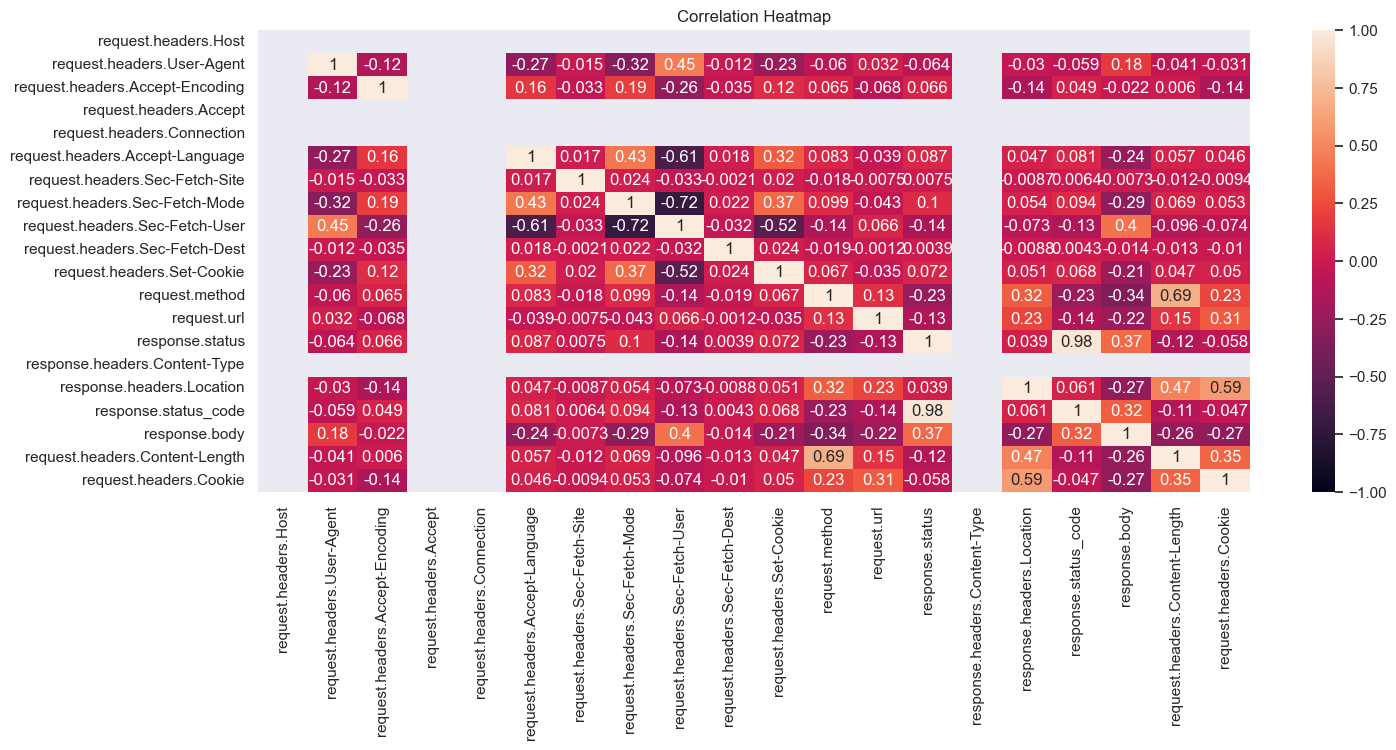

In [59]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


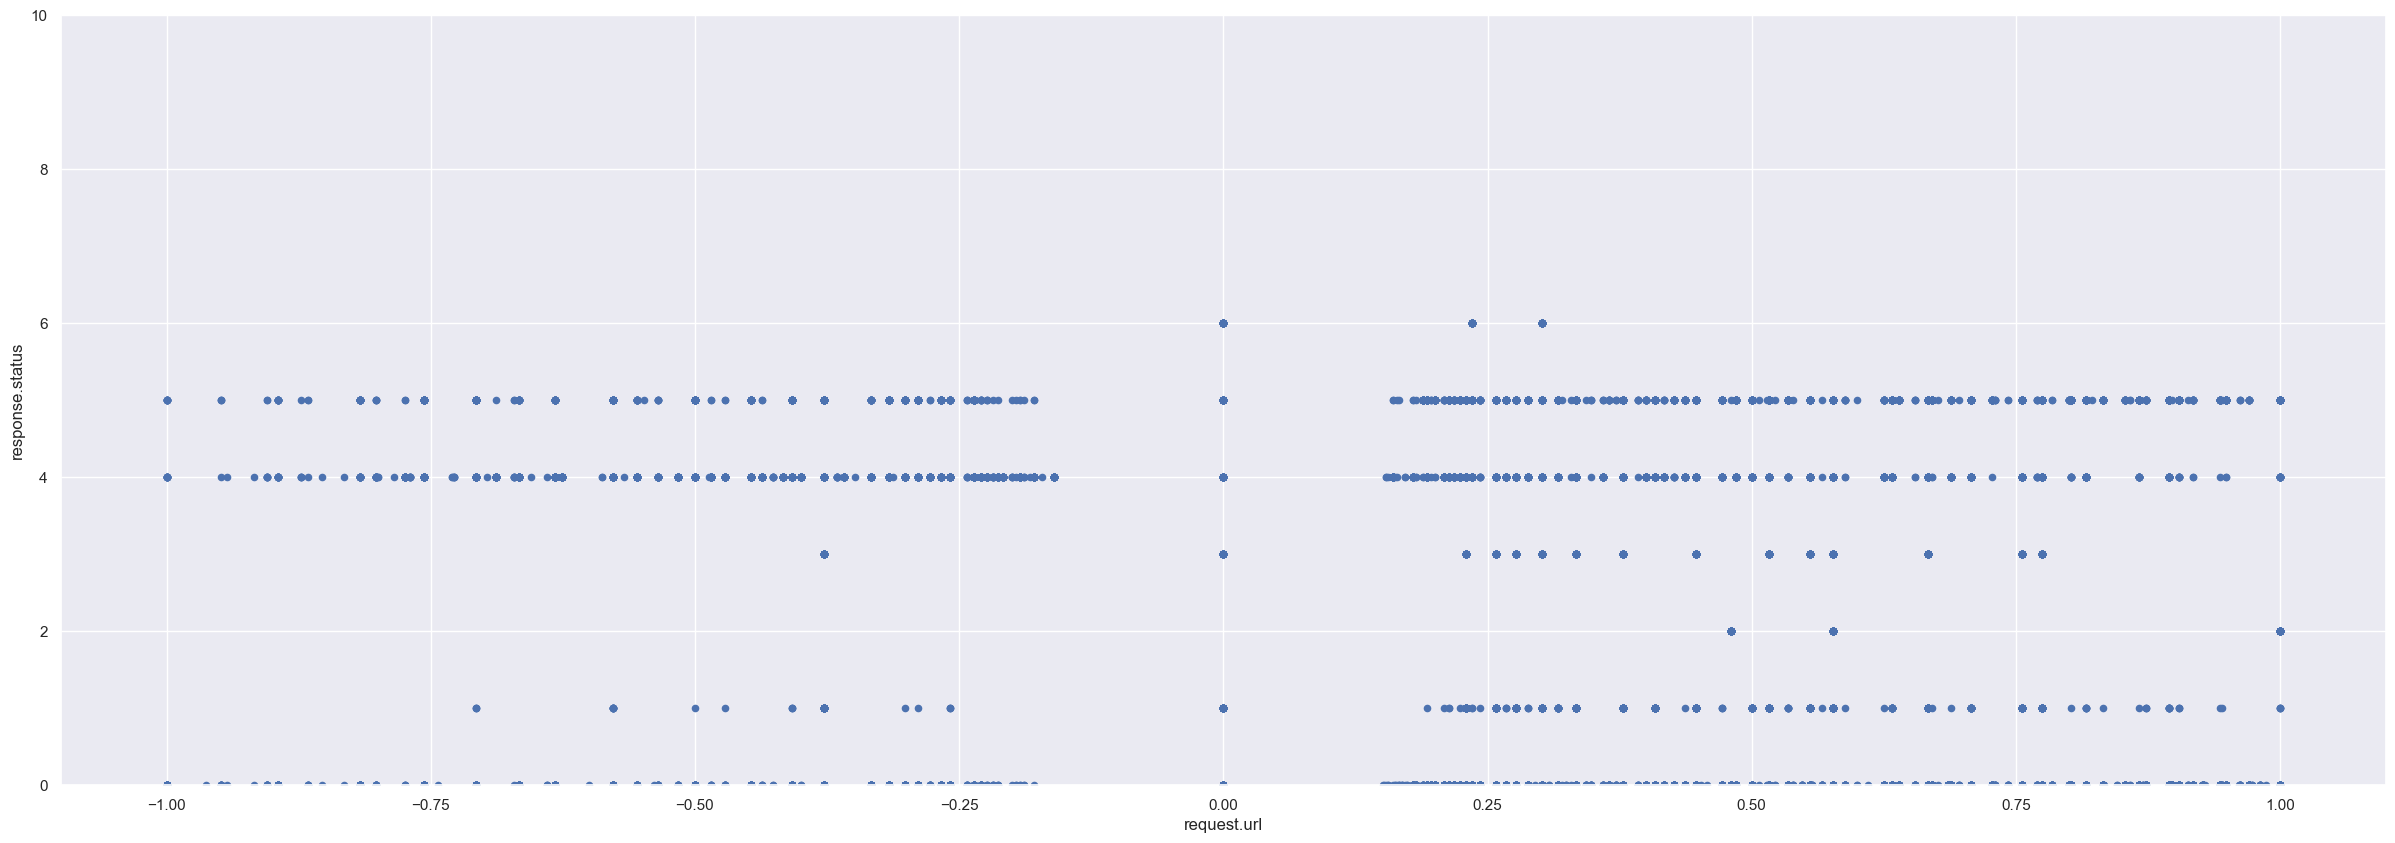

In [60]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df4['response.status'], df4[var]], axis=1)
data.plot.scatter(x=var, y='response.status', ylim=(0,10));

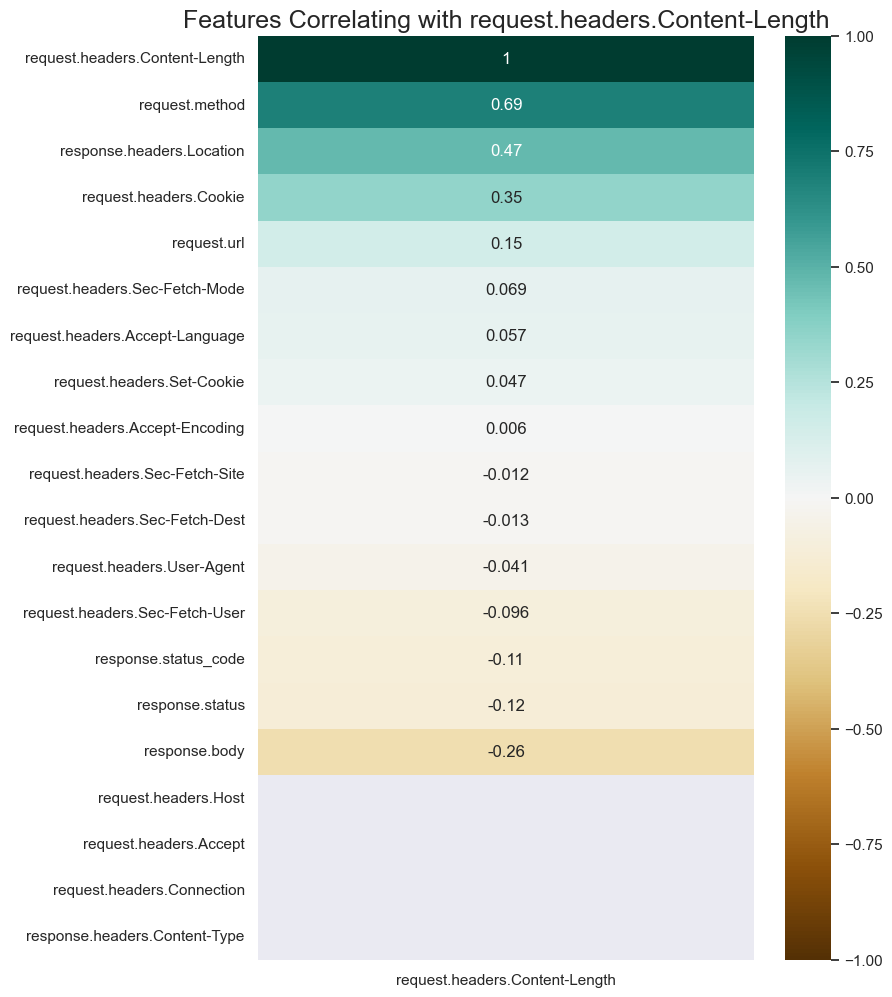

In [61]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df4.corr()[['request.headers.Content-Length']].sort_values(by='request.headers.Content-Length', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with request.headers.Content-Length', fontdict={'fontsize':18});

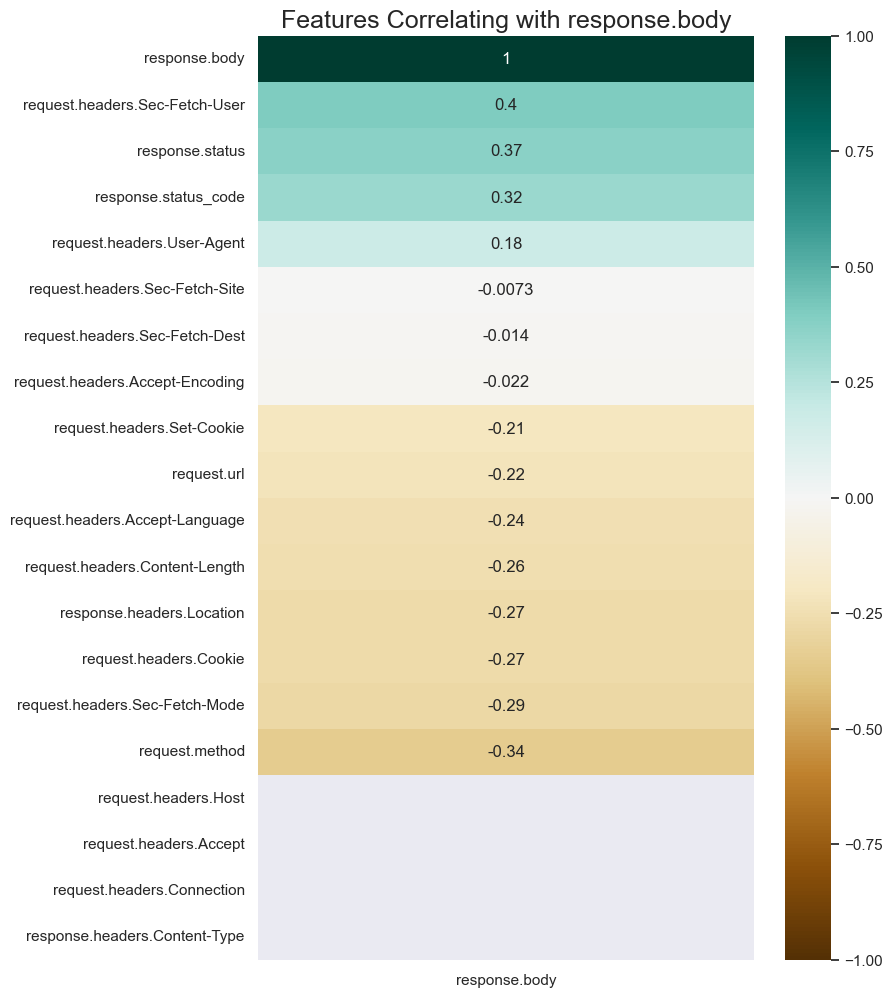

In [62]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df4.corr()[['response.body']].sort_values(by='response.body', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with response.body', fontdict={'fontsize':18});

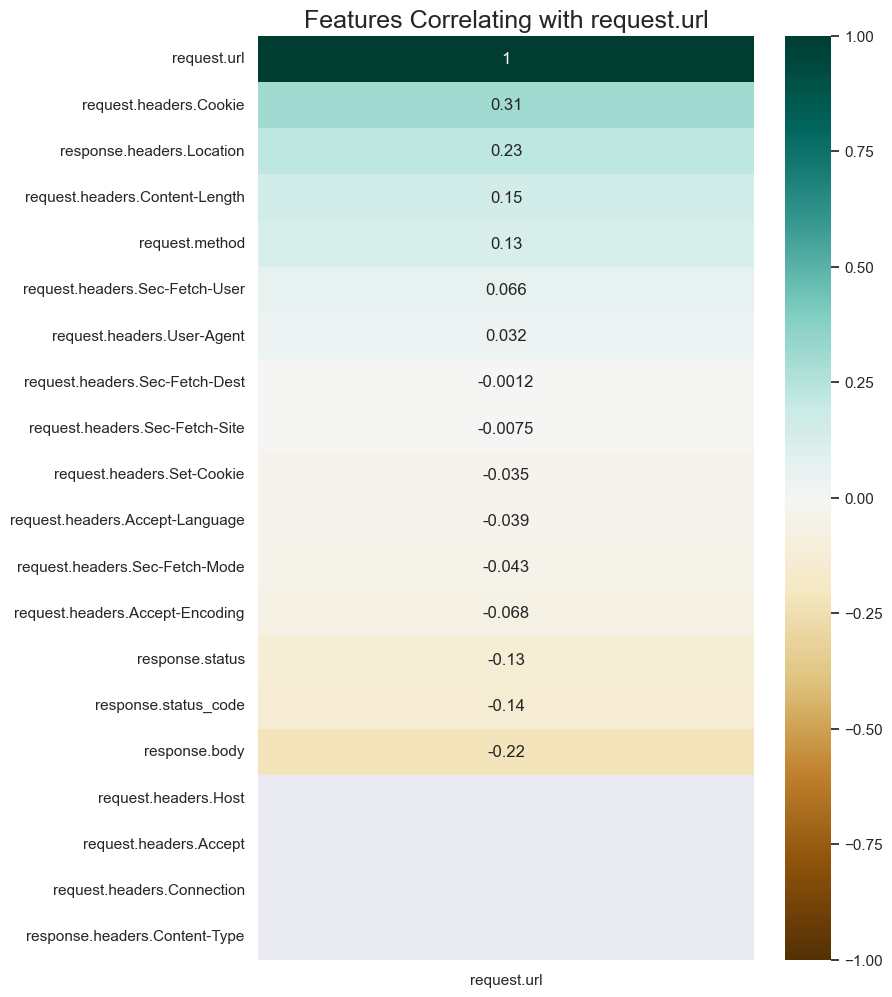

In [63]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df4.corr()[['request.url']].sort_values(by='request.url', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with request.url', fontdict={'fontsize':18});

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


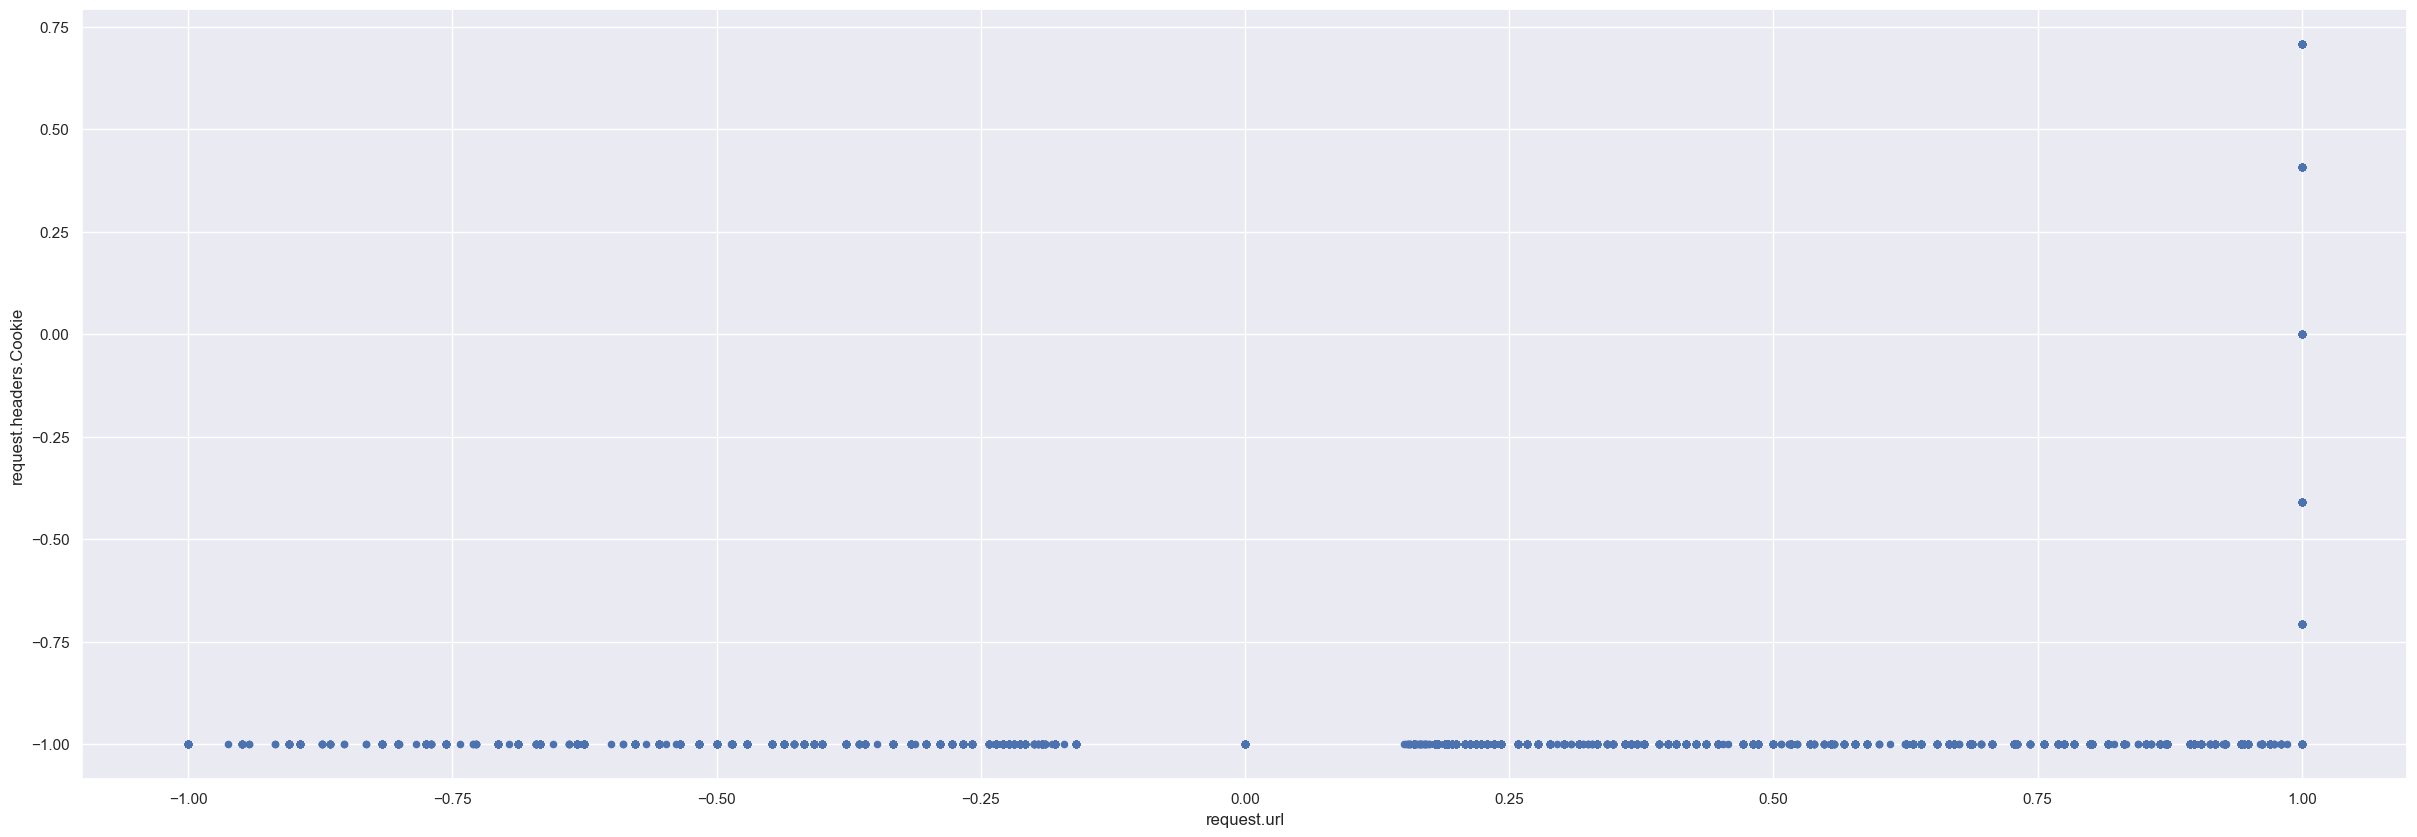

In [64]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df4['request.headers.Cookie'], df4[var]], axis=1)
data.plot.scatter(x=var, y='request.headers.Cookie');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


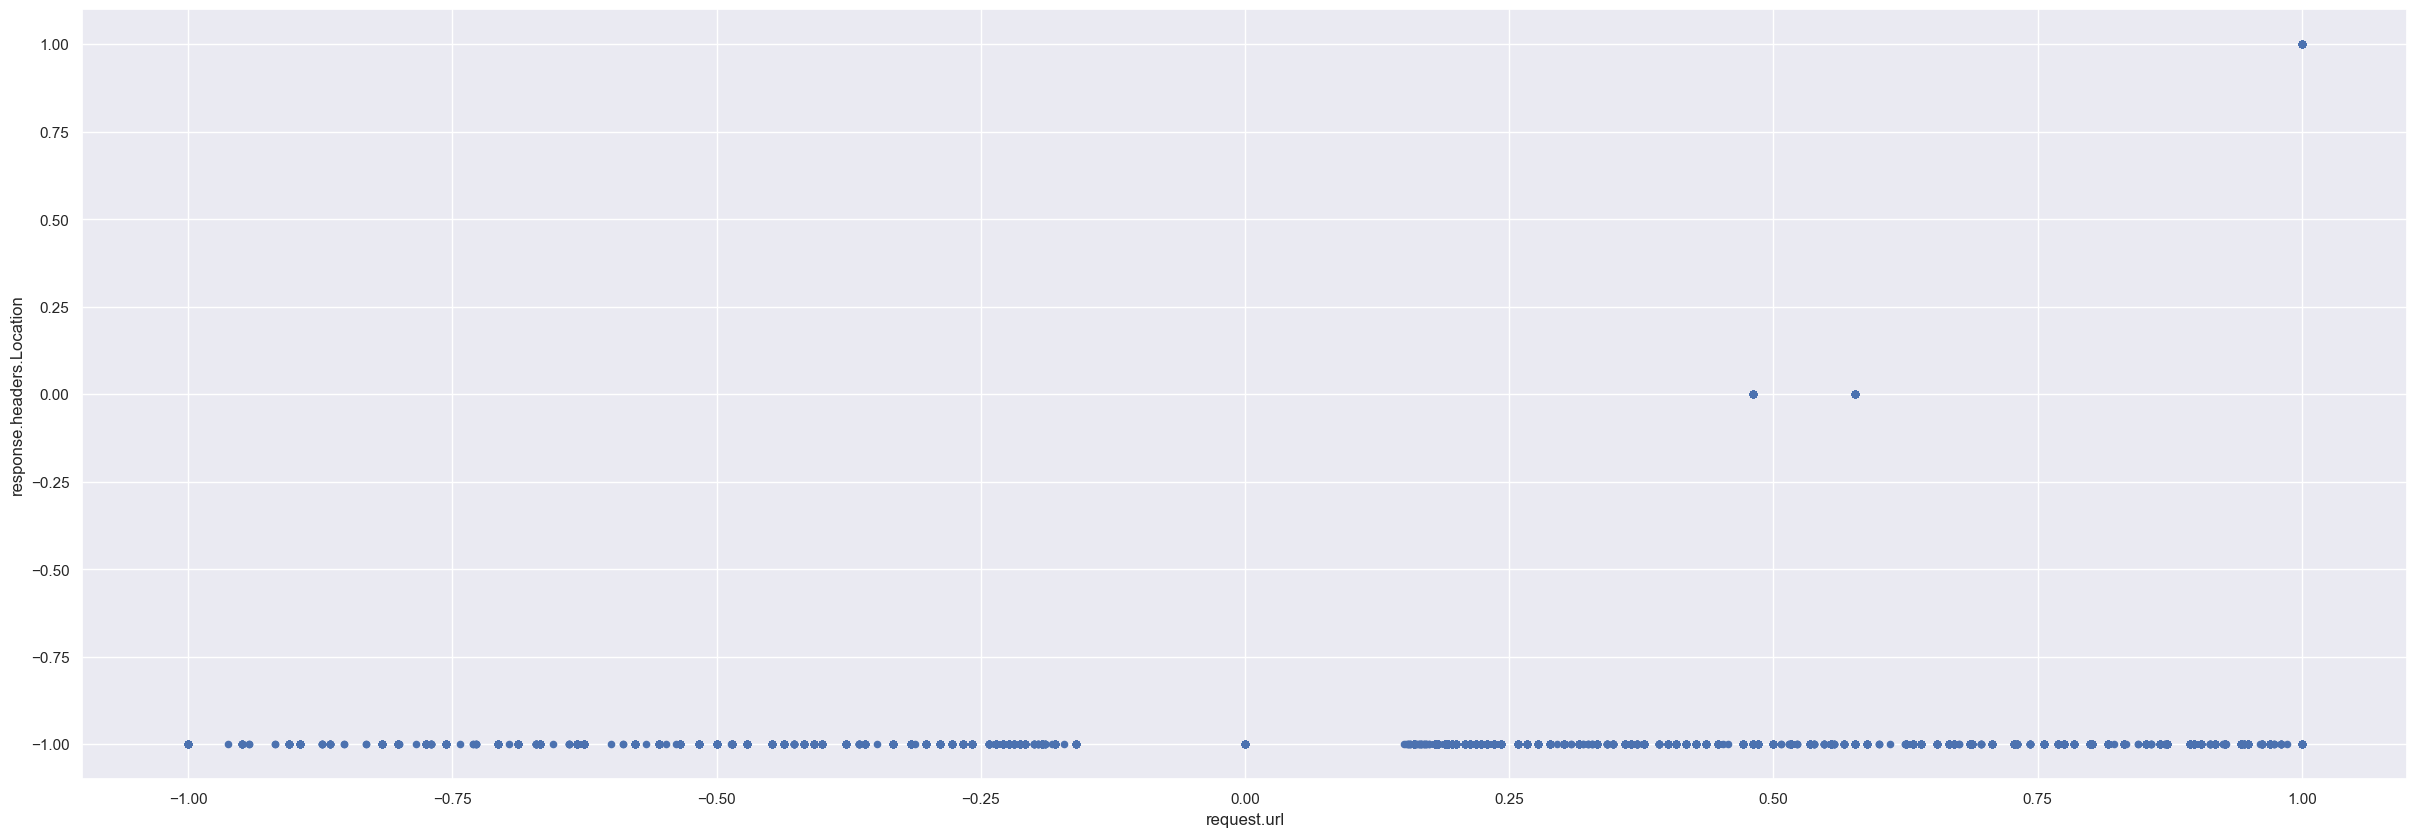

In [65]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df4['response.headers.Location'], df4[var]], axis=1)
data.plot.scatter(x=var, y='response.headers.Location');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


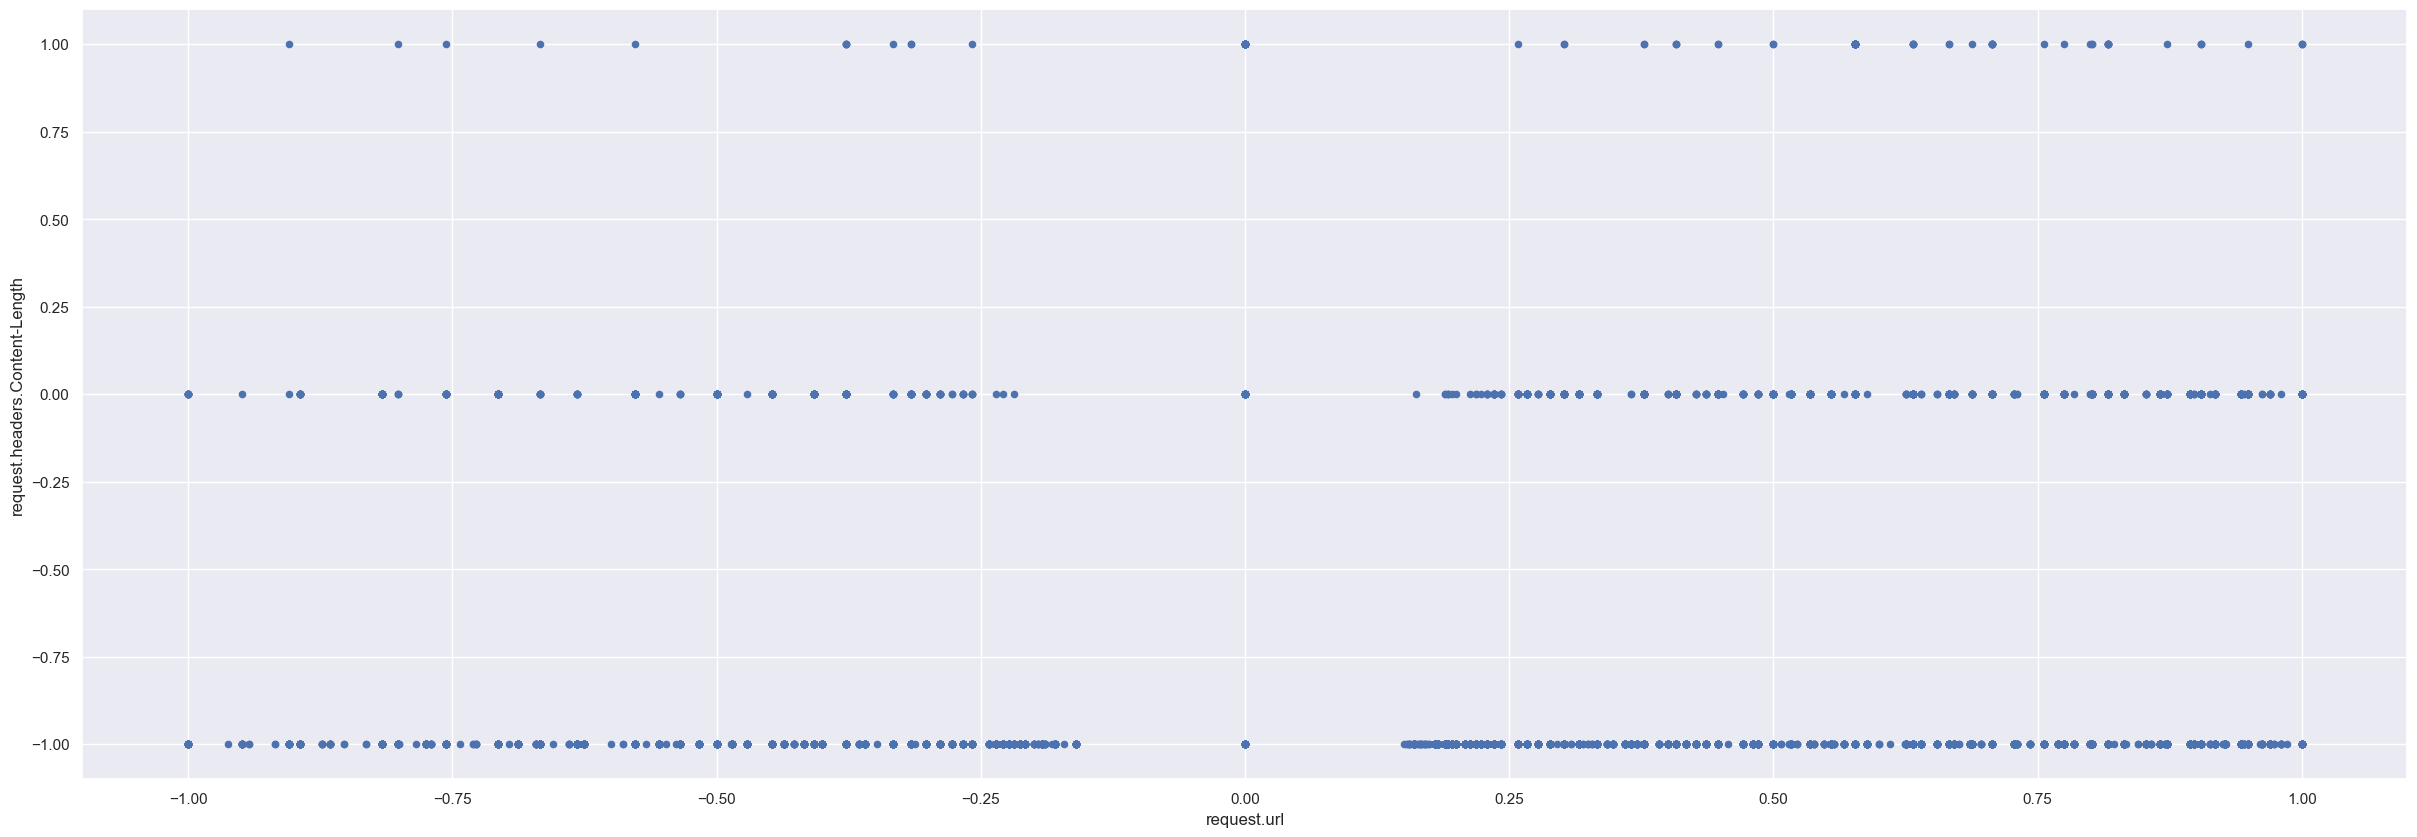

In [66]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df4['request.headers.Content-Length'], df4[var]], axis=1)
data.plot.scatter(x=var, y='request.headers.Content-Length');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


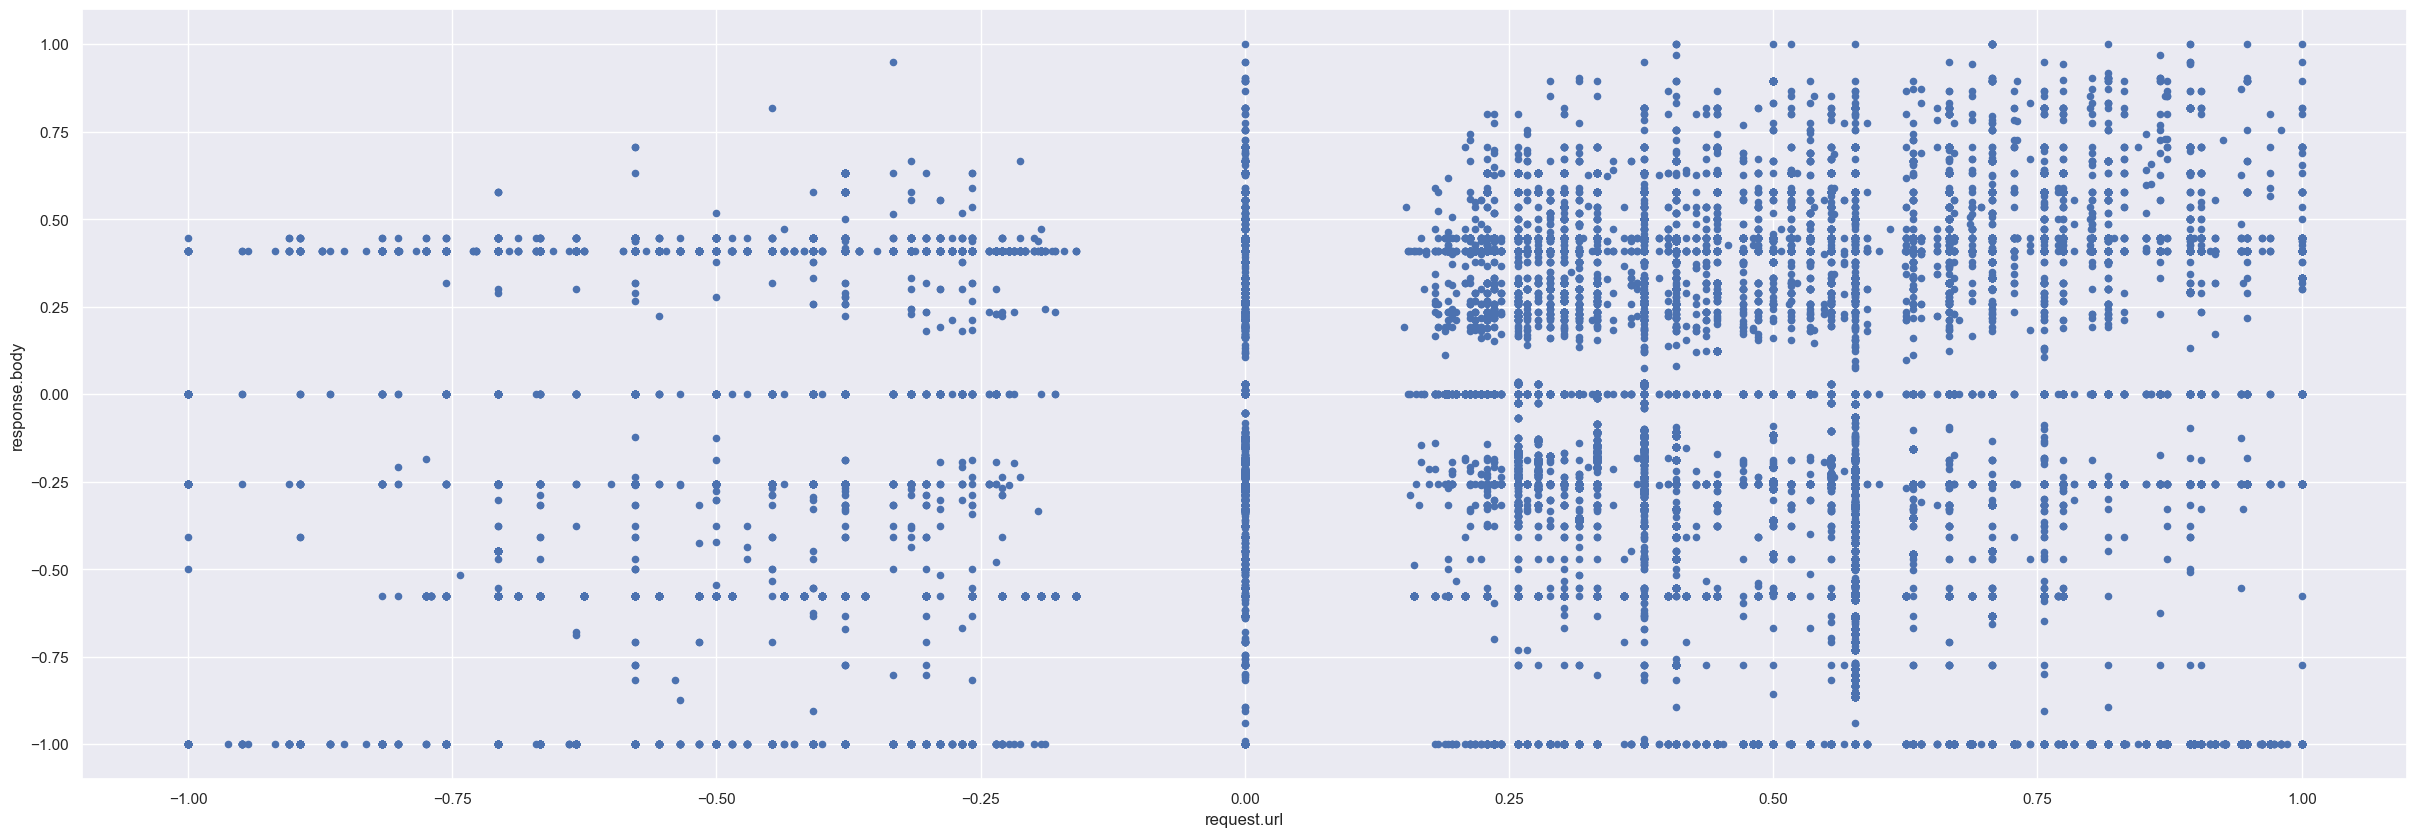

In [67]:
#scatter plot totalbsmtsf/saleprice
var = 'request.url'
data = pd.concat([df4['response.body'], df4[var]], axis=1)
data.plot.scatter(x=var, y='response.body');